In [3]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import threading
import os
import matplotlib.mlab as ml
import h5py

from scipy import optimize
import sys
sys.path.insert(0, '/Users/yihanwang/Projects/athena/vis/python')
import athena_read as ar
plt.rcParams['agg.path.chunksize']=100000
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["font.family"] = "Arial"
#plt.style.use('seaborn-deep')
plt.rc('grid', linestyle="--", color='gray')
#plt.rc('xtick', direction = 'in')
#plt.rc('ytick', direction= 'in')
# @working path
FIG_PATH     = '../tex/figs/'
WEB_FIG_PATH = '../tex/web-figs/'
DATA_PATH    = '../code/'

# @global settings
WEB_FIG_DPI  = 600
FIG_DPI      = 800
FIG_EXT      = '.pdf'
WEB_FIG_EXT  = '.png'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT, web_fig_ext = WEB_FIG_EXT):
    if name != '':
        handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0)
    #handler.savefig(WEB_FIG_PATH + name + web_fig_ext, dpi = WEB_FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
prefix = 'tests/'

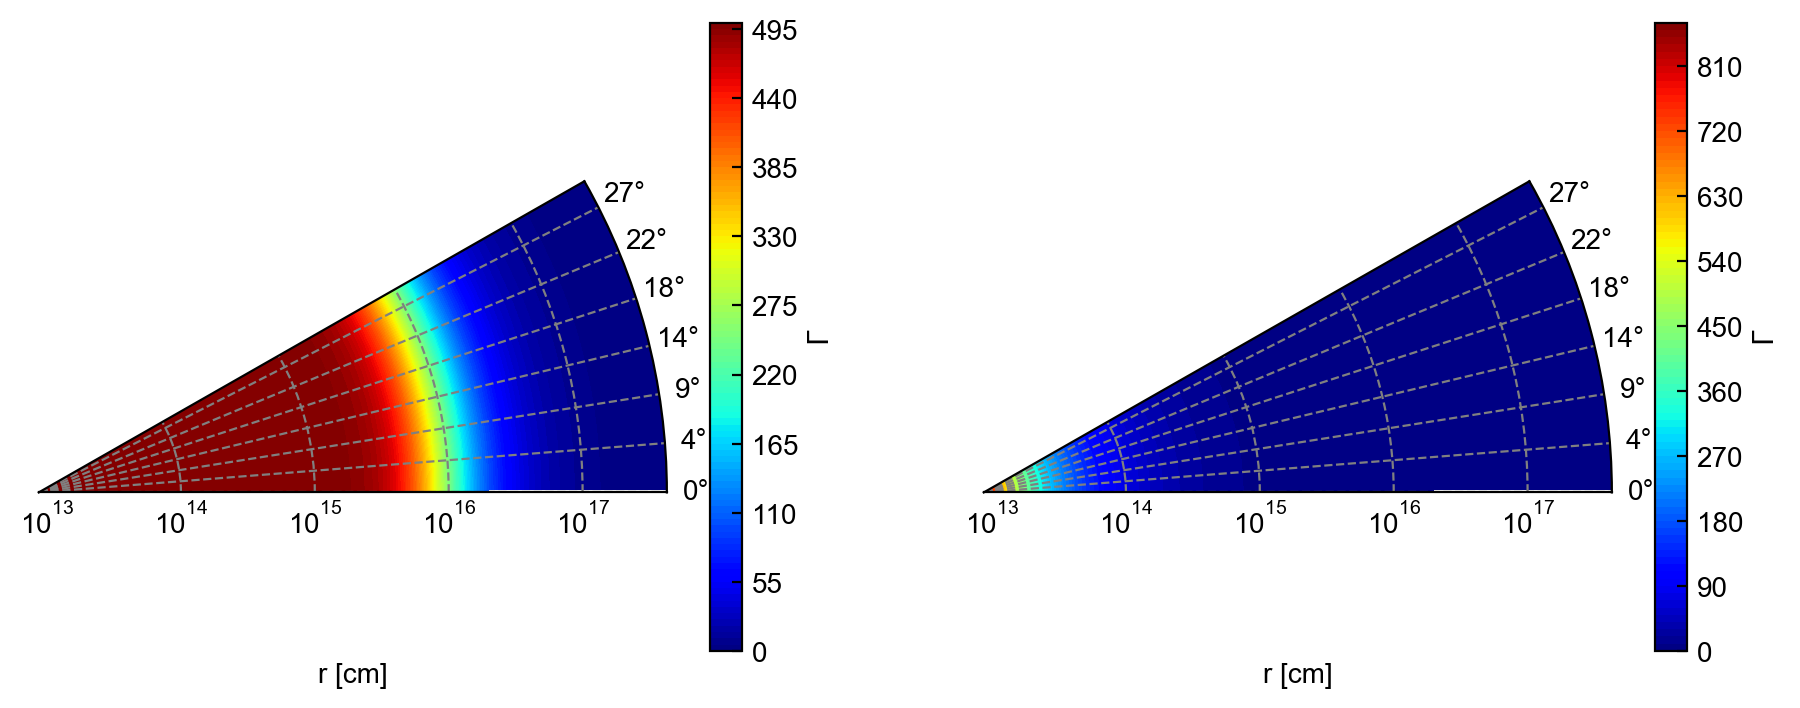

In [955]:
def show_dynamics(r_name, theta_name,zoom):
    r1d = np.loadtxt(r_name) * 1.5e13
    theta1d = np.loadtxt(theta_name)*zoom

    r, theta = np.meshgrid(r1d, theta1d)
    
    gamma = np.loadtxt(prefix+'Gamma.txt')

    beta = np.sqrt(gamma*gamma-1)/gamma

    t_com = np.loadtxt(prefix+'t_com.txt')

    fig = plt.figure(figsize=(4.8*2, 3.6))

    ax1 = fig.add_subplot(1,2,1,projection='polar')
    cs = ax1.contourf(theta, r, (gamma), levels=100, cmap = 'jet')
    ax1.set_xlim(0, theta1d[-1])
    ax1.set_xlabel('r [cm]')
    cbar =plt.colorbar(cs)
    cbar.set_label(r'$\Gamma$')
    ax1.set_yscale('log')

    ax2 = fig.add_subplot(1,2,2,projection='polar')
    cs = ax2.contourf(theta, r,1/(beta)**2/t_com, levels=100, cmap = 'jet')
    ax2.set_xlim(0, theta1d[-1])
    ax2.set_xlabel('r [cm]')
    cbar =plt.colorbar(cs)
    cbar.set_label(r'$\Gamma$')
    ax2.set_yscale('log')
    
    plt.tight_layout()
    plt.savefig(prefix+'gamma.png', dpi=300, bbox_inches='tight')

show_dynamics(prefix+'r.txt', prefix+'theta.txt',30)

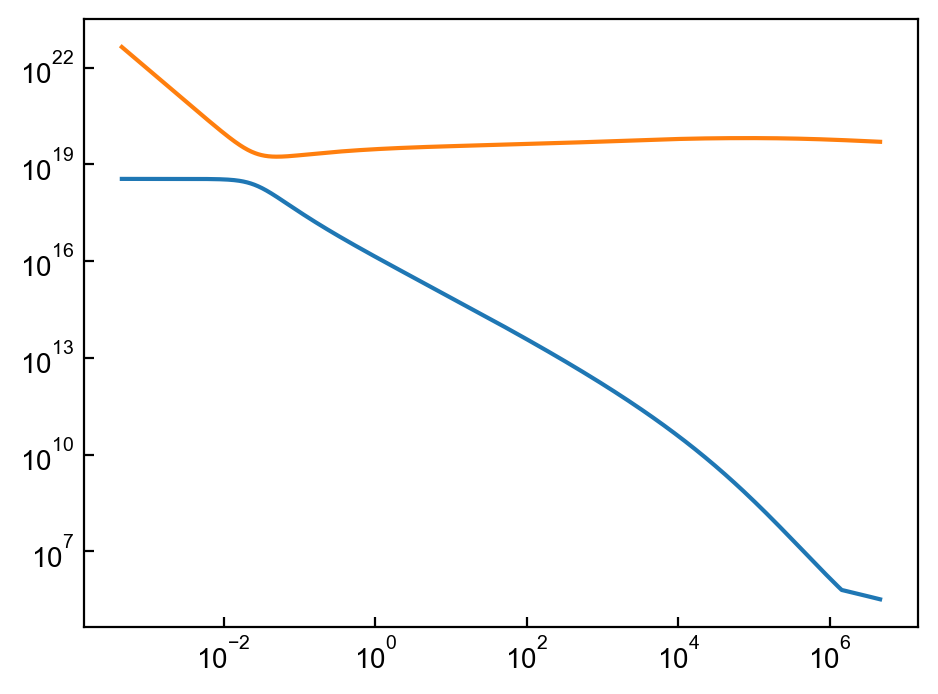

In [7]:
def gamma_dynamics(r_name, theta_name,zoom):
    r1d = np.loadtxt(r_name) * 1.5e13
    theta1d = np.loadtxt(theta_name)*zoom

    r, theta = np.meshgrid(r1d, theta1d)
    
    gamma = np.loadtxt(prefix+'shock_Gamma.txt')[0,:]

    beta = np.sqrt(gamma*gamma-1)/gamma

    t_obs = np.loadtxt(prefix+'t_obs.txt')[0,:]

    B = np.loadtxt(prefix+'shock_B.txt')[0,:]

    fig = plt.figure(figsize=(4.8, 3.6))

    nu_m = np.loadtxt(prefix+'syn_nu_m.txt')[0,:]

    nu_c = np.loadtxt(prefix+'syn_nu_c.txt')[0,:]

    #F_peak = np.loadtxt(prefix+'j_nu_19.txt')[0,:]

    ax1 = fig.add_subplot(1,1,1)

    #ax1.loglog(t_obs, r1d, label='t=0')

    #ax1.loglog(r1d, gamma, label='t=0')
    #ax1.loglog(r1d, 5e26*r1d**(-1.5), label='t=0')

    #ax1.loglog(t_obs, gamma, label='t=0')
    #ax1.loglog(t_obs, 5*t_obs**(-3.0/8), label='t=0')

    ax1.loglog(t_obs, nu_m,label='t=0')
    ax1.loglog(t_obs, nu_c,label='t=0')
    #ax1.loglog(t_obs, nu_a,label='t=0')
   # ax1.loglog(t_obs, 1e16*t_obs**(-9/8), label='t=0')

    #ax1.loglog(t_obs, nu_c*gamma, label='t=0')
    #ax1.loglog(t_obs, 2e20*t_obs**(-1/2), label='t=0')

    #ax1.loglog(t_obs, B, label='t=0')
    #ax1.loglog(t_obs, 4e-8*t_obs**(-3.0/8), label='t=0')

    #ax1.loglog(t_obs, F_peak, label='t=0')

    plt.tight_layout()

gamma_dynamics(prefix+'coord_r.txt', prefix+'coord_theta.txt',30)

In [409]:
def show_syn_nv(r_name, theta_name, x,zoom):
    r1d = np.loadtxt(r_name) * 1.5e13
    theta1d = np.loadtxt(theta_name)*zoom

    r, theta = np.meshgrid(r1d, theta1d)
    
    nu_m = np.loadtxt(prefix+'syn'+x+'_nu_m.txt')/500
    nu_c = np.loadtxt(prefix+'syn'+x+'_nu_c.txt')/500
    nu_a = np.loadtxt(prefix+'syn'+x+'_nu_a.txt')/500
    nu_p = np.loadtxt(prefix+'syn'+x+'_nu_E_peak.txt')/500
    Y = np.loadtxt(prefix+'Y'+x+'.txt')
    fig = plt.figure(figsize=(3*4.8, 2*3.6))

    min_nu = min(nu_m.min(),nu_c.min(),nu_a.min())
    max_nu = max(nu_m.max(),nu_c.max(),nu_a.max())

    axs = [ fig.add_subplot(2,3,i+1,projection='polar') for i in range(6)]
    for ax, nu, name in zip(axs, [nu_m, nu_c, nu_a, nu_p], ['\\nu^\\prime_m', '\\nu^\\prime_c', '\\nu^\\prime_a', '\\nu^\\prime_{peak}']):
        lv = np.linspace(np.log10(min_nu),np.log10(max_nu),100)
        cs = ax.contourf(theta, r, np.log10(nu), levels=100, cmap = 'jet',extend='both')
        ax.set_xlim(0, theta1d[-1])
        ax.set_xlabel('r [cm]')
        cbar =plt.colorbar(cs)
        cbar.set_label(r'$\log_{10}('+name+'/Hz)$')
        ax.set_yscale('log')
        ax.set_title('$'+name+'$')

    I = (nu_a <= nu_m) & (nu_m <= nu_c)
    II = (nu_m <= nu_a) & (nu_a <= nu_c)
    III = (nu_a <= nu_c) & (nu_c <= nu_m)
    IV = (nu_c <= nu_a) & (nu_a <= nu_m)
    V = (nu_m <= nu_c) & (nu_c <= nu_a)
    VI = (nu_c <= nu_m) & (nu_m <= nu_a)
    regime = np.zeros_like(nu_m)
    regime[I] = 1
    regime[II] = 2
    regime[III] = 3
    regime[IV] = 4
    regime[V] = 5
    regime[VI] = 6

    print(np.unique(regime))

    ax = axs[4]
    
    cs = ax.contourf(theta, r, regime, levels=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], cmap = 'rainbow')
    ax.set_xlim(0, theta1d[-1])
    ax.set_xlabel('r [cm]')
    cbar =plt.colorbar(cs, ticks=[1,2,3,4,5,6])
    cbar.ax.set_yticklabels(['I (a,m,c)', 'II (m,a,c)', 'III (a,c,m)','IV (c,a,m)','V (m,c,a)','VI (c,m,a)']) 
    ax.set_yscale('log')

    ax = axs[5]

    #cs = ax.contourf(theta, r, Y, levels=np.logspace(-3,1,100), cmap = 'rainbow',norm = mpl.colors.LogNorm(),extend='both')
    cs = ax.contourf(theta, r, Y, levels=100, cmap = 'rainbow')
    ax.set_xlim(0, theta1d[-1])
    ax.set_xlabel('r [cm]')
    #cbar =plt.colorbar(cs,ticks=[1e-3,1e-2,1e-1,1e0,1e1,1e2])
    cbar =plt.colorbar(cs)
    cbar.set_label(r'$\hat{Y}$')
    ax.set_yscale('log')
    ax.set_title('$\hat{Y}$')

    plt.tight_layout()
    plt.savefig(prefix+x+'nu.png', dpi=300, bbox_inches='tight')




[1. 3.]


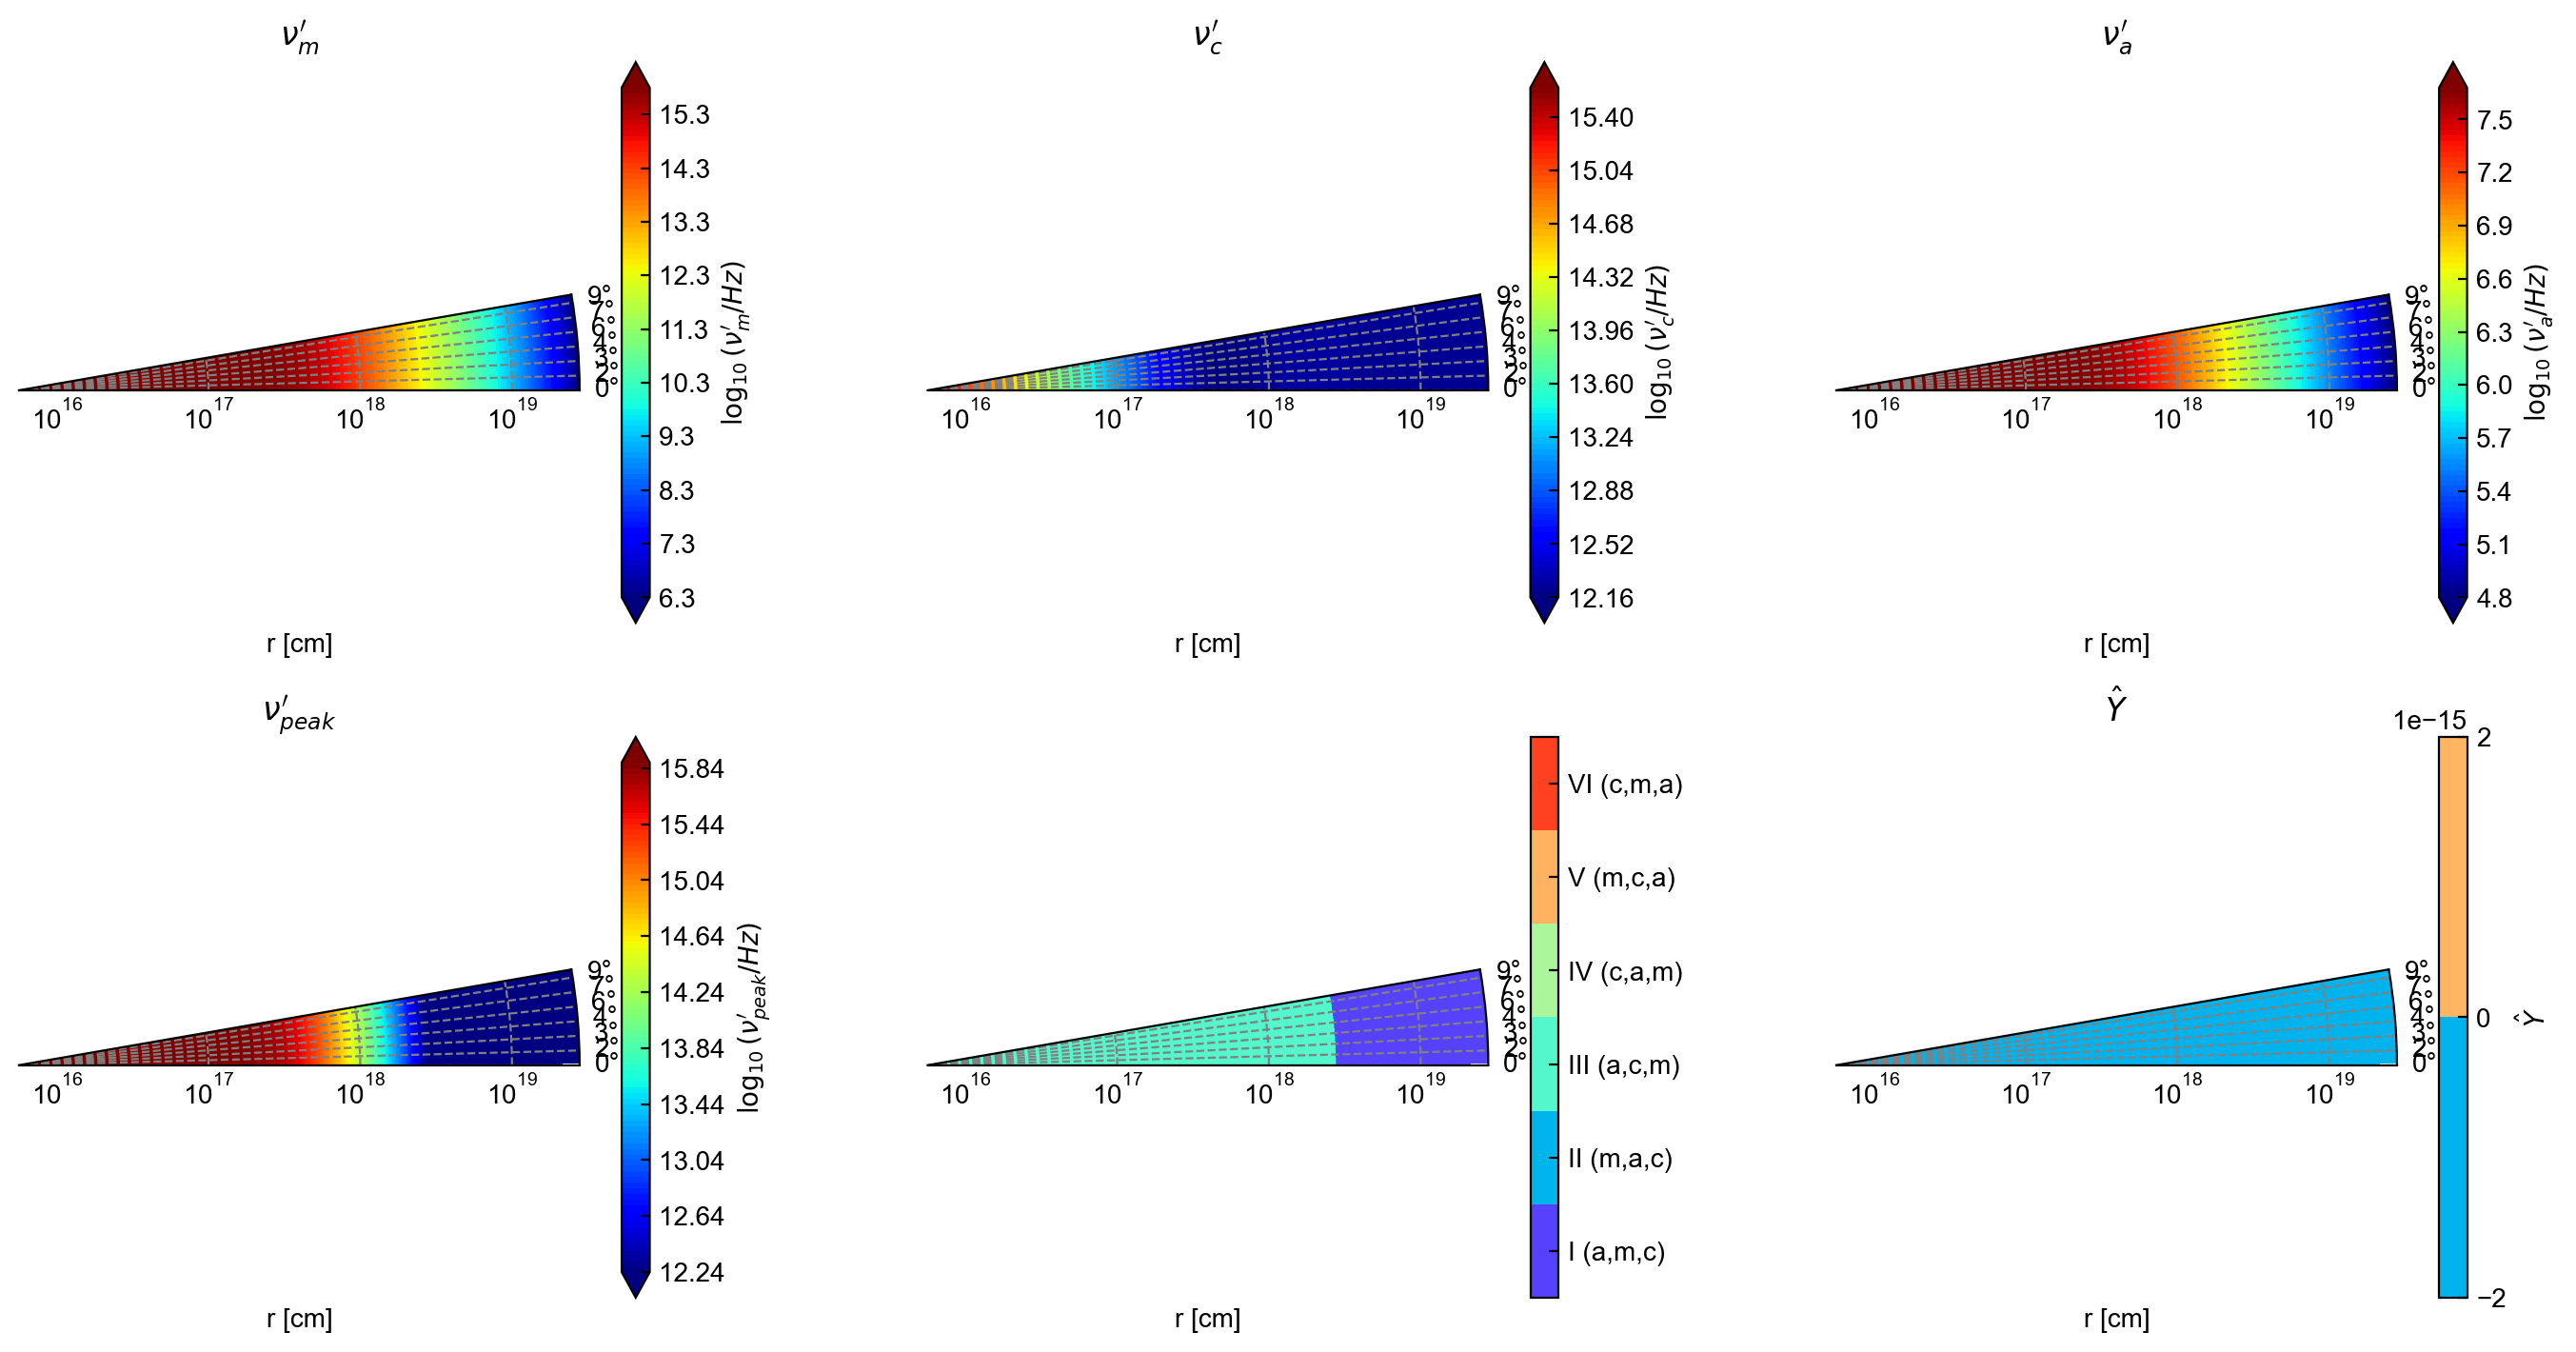

In [410]:
show_syn_nv(prefix+'coord_r.txt', prefix+'coord_theta.txt','',10)

[1. 2.]


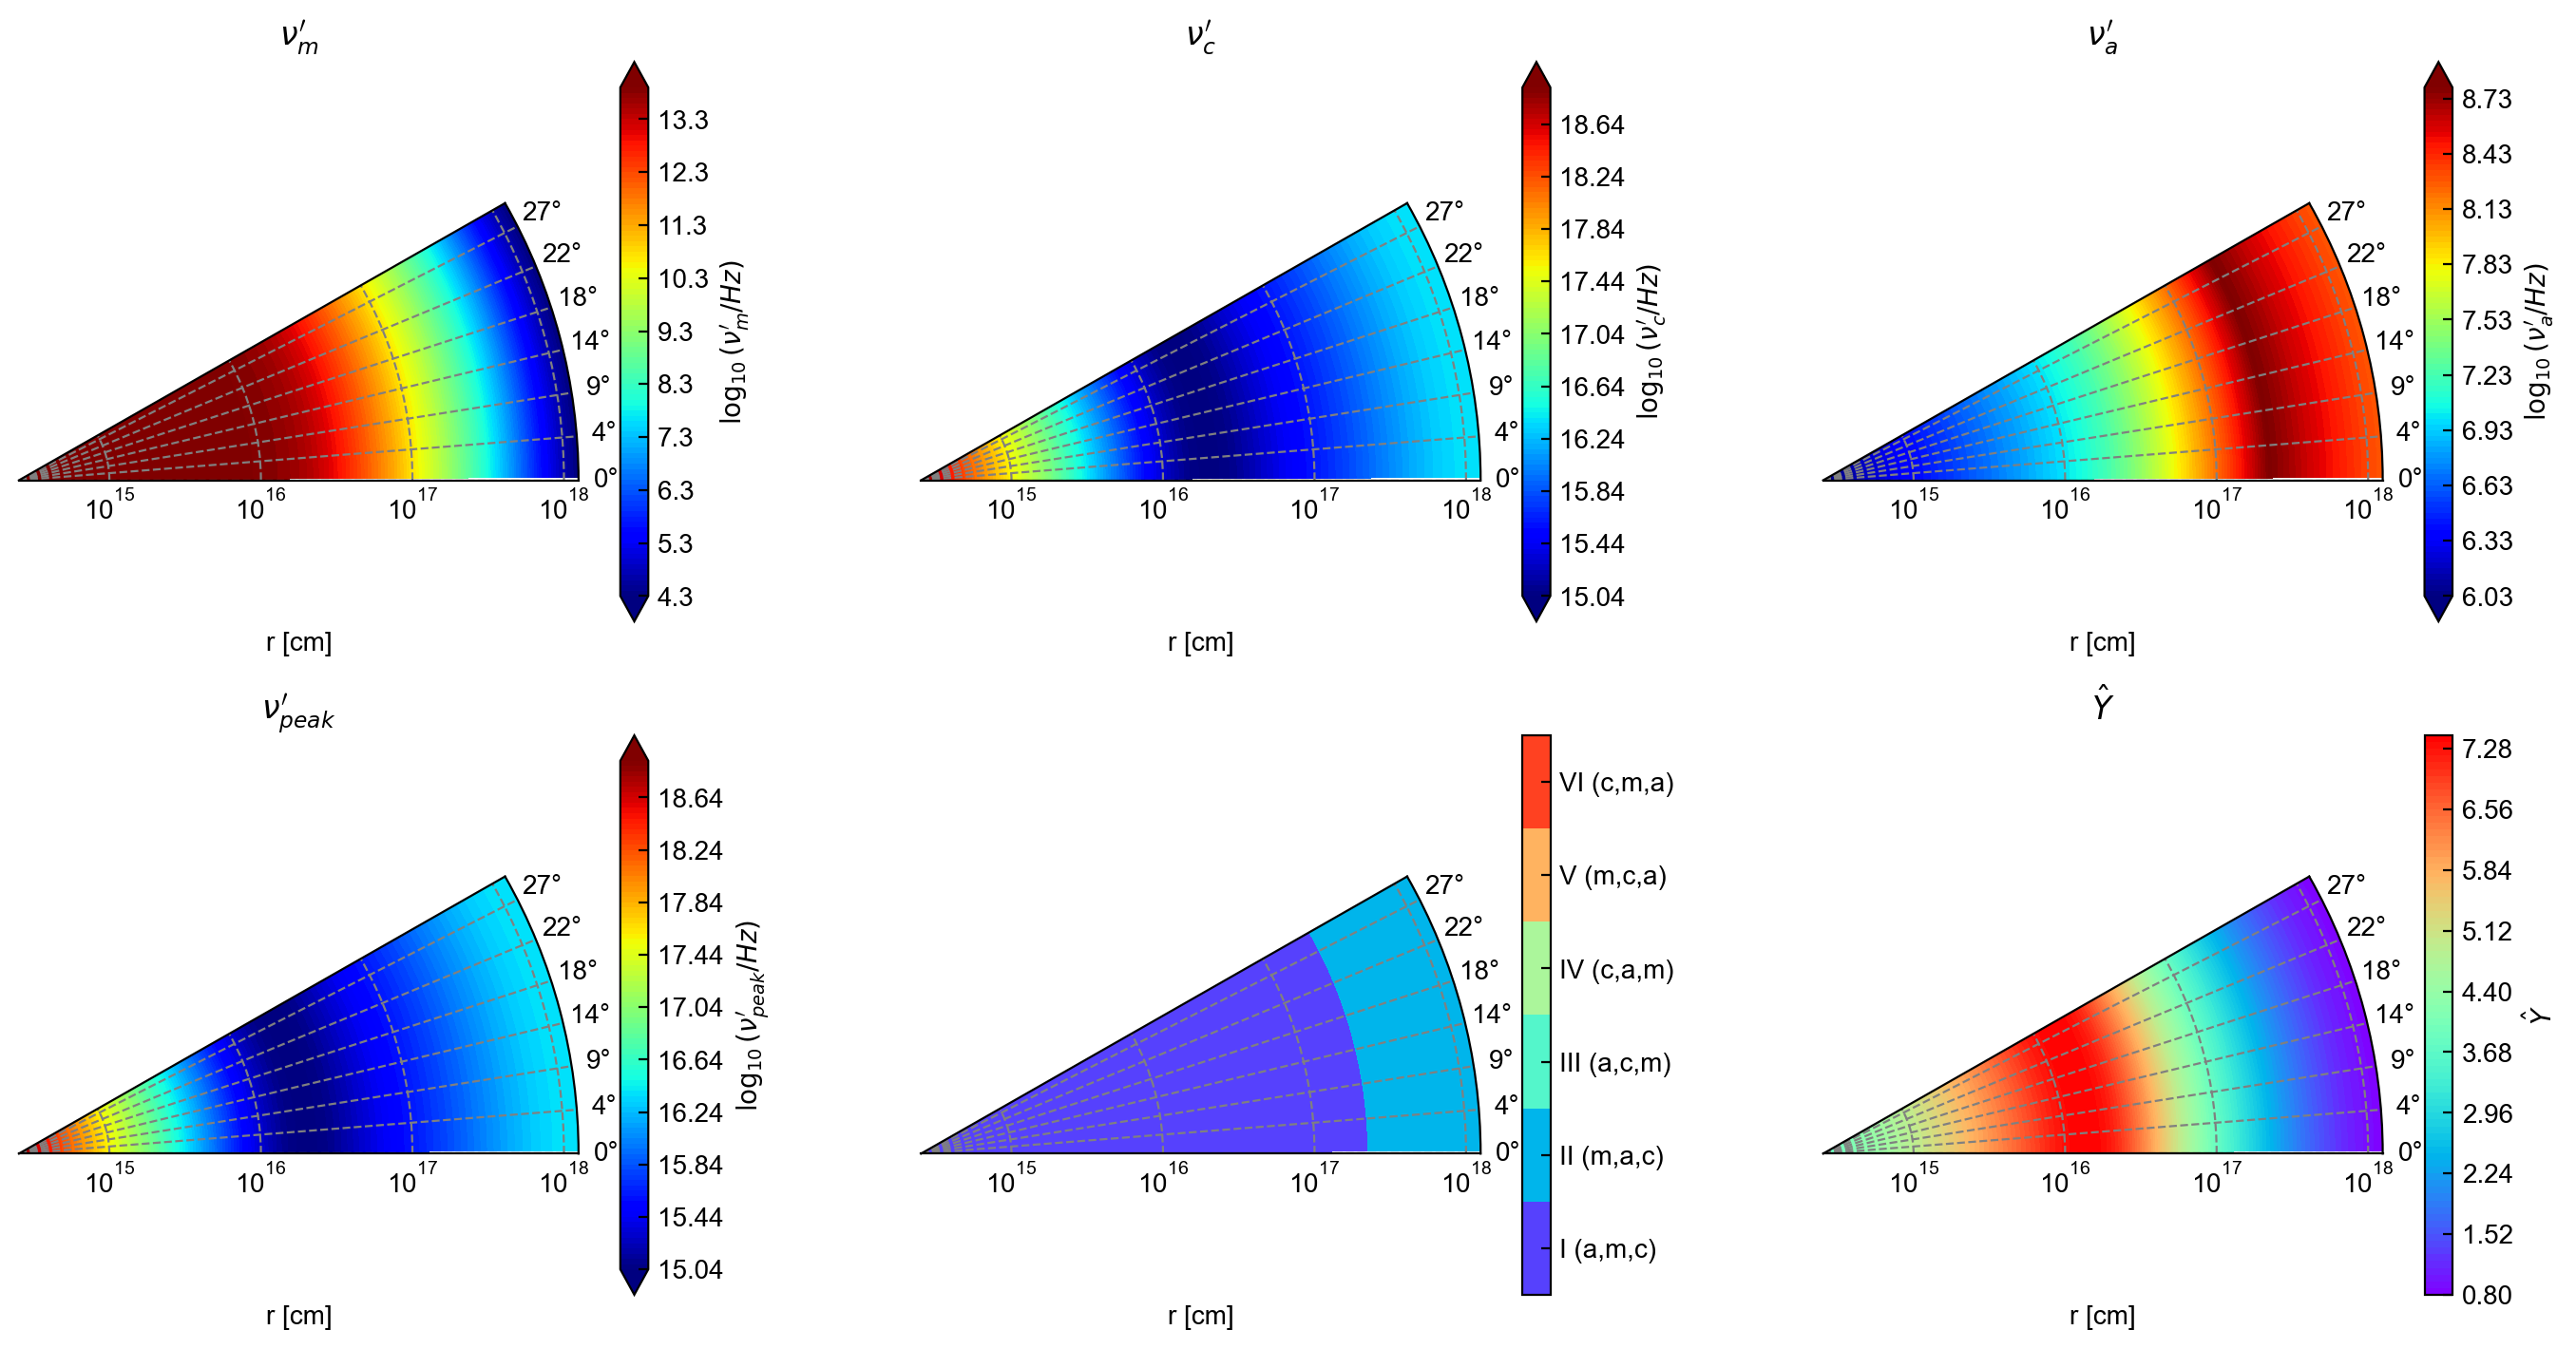

In [781]:
show_syn_nv(prefix+'coord_r.txt', prefix+'coord_theta.txt','_IC',3)

[1. 2. 3.]


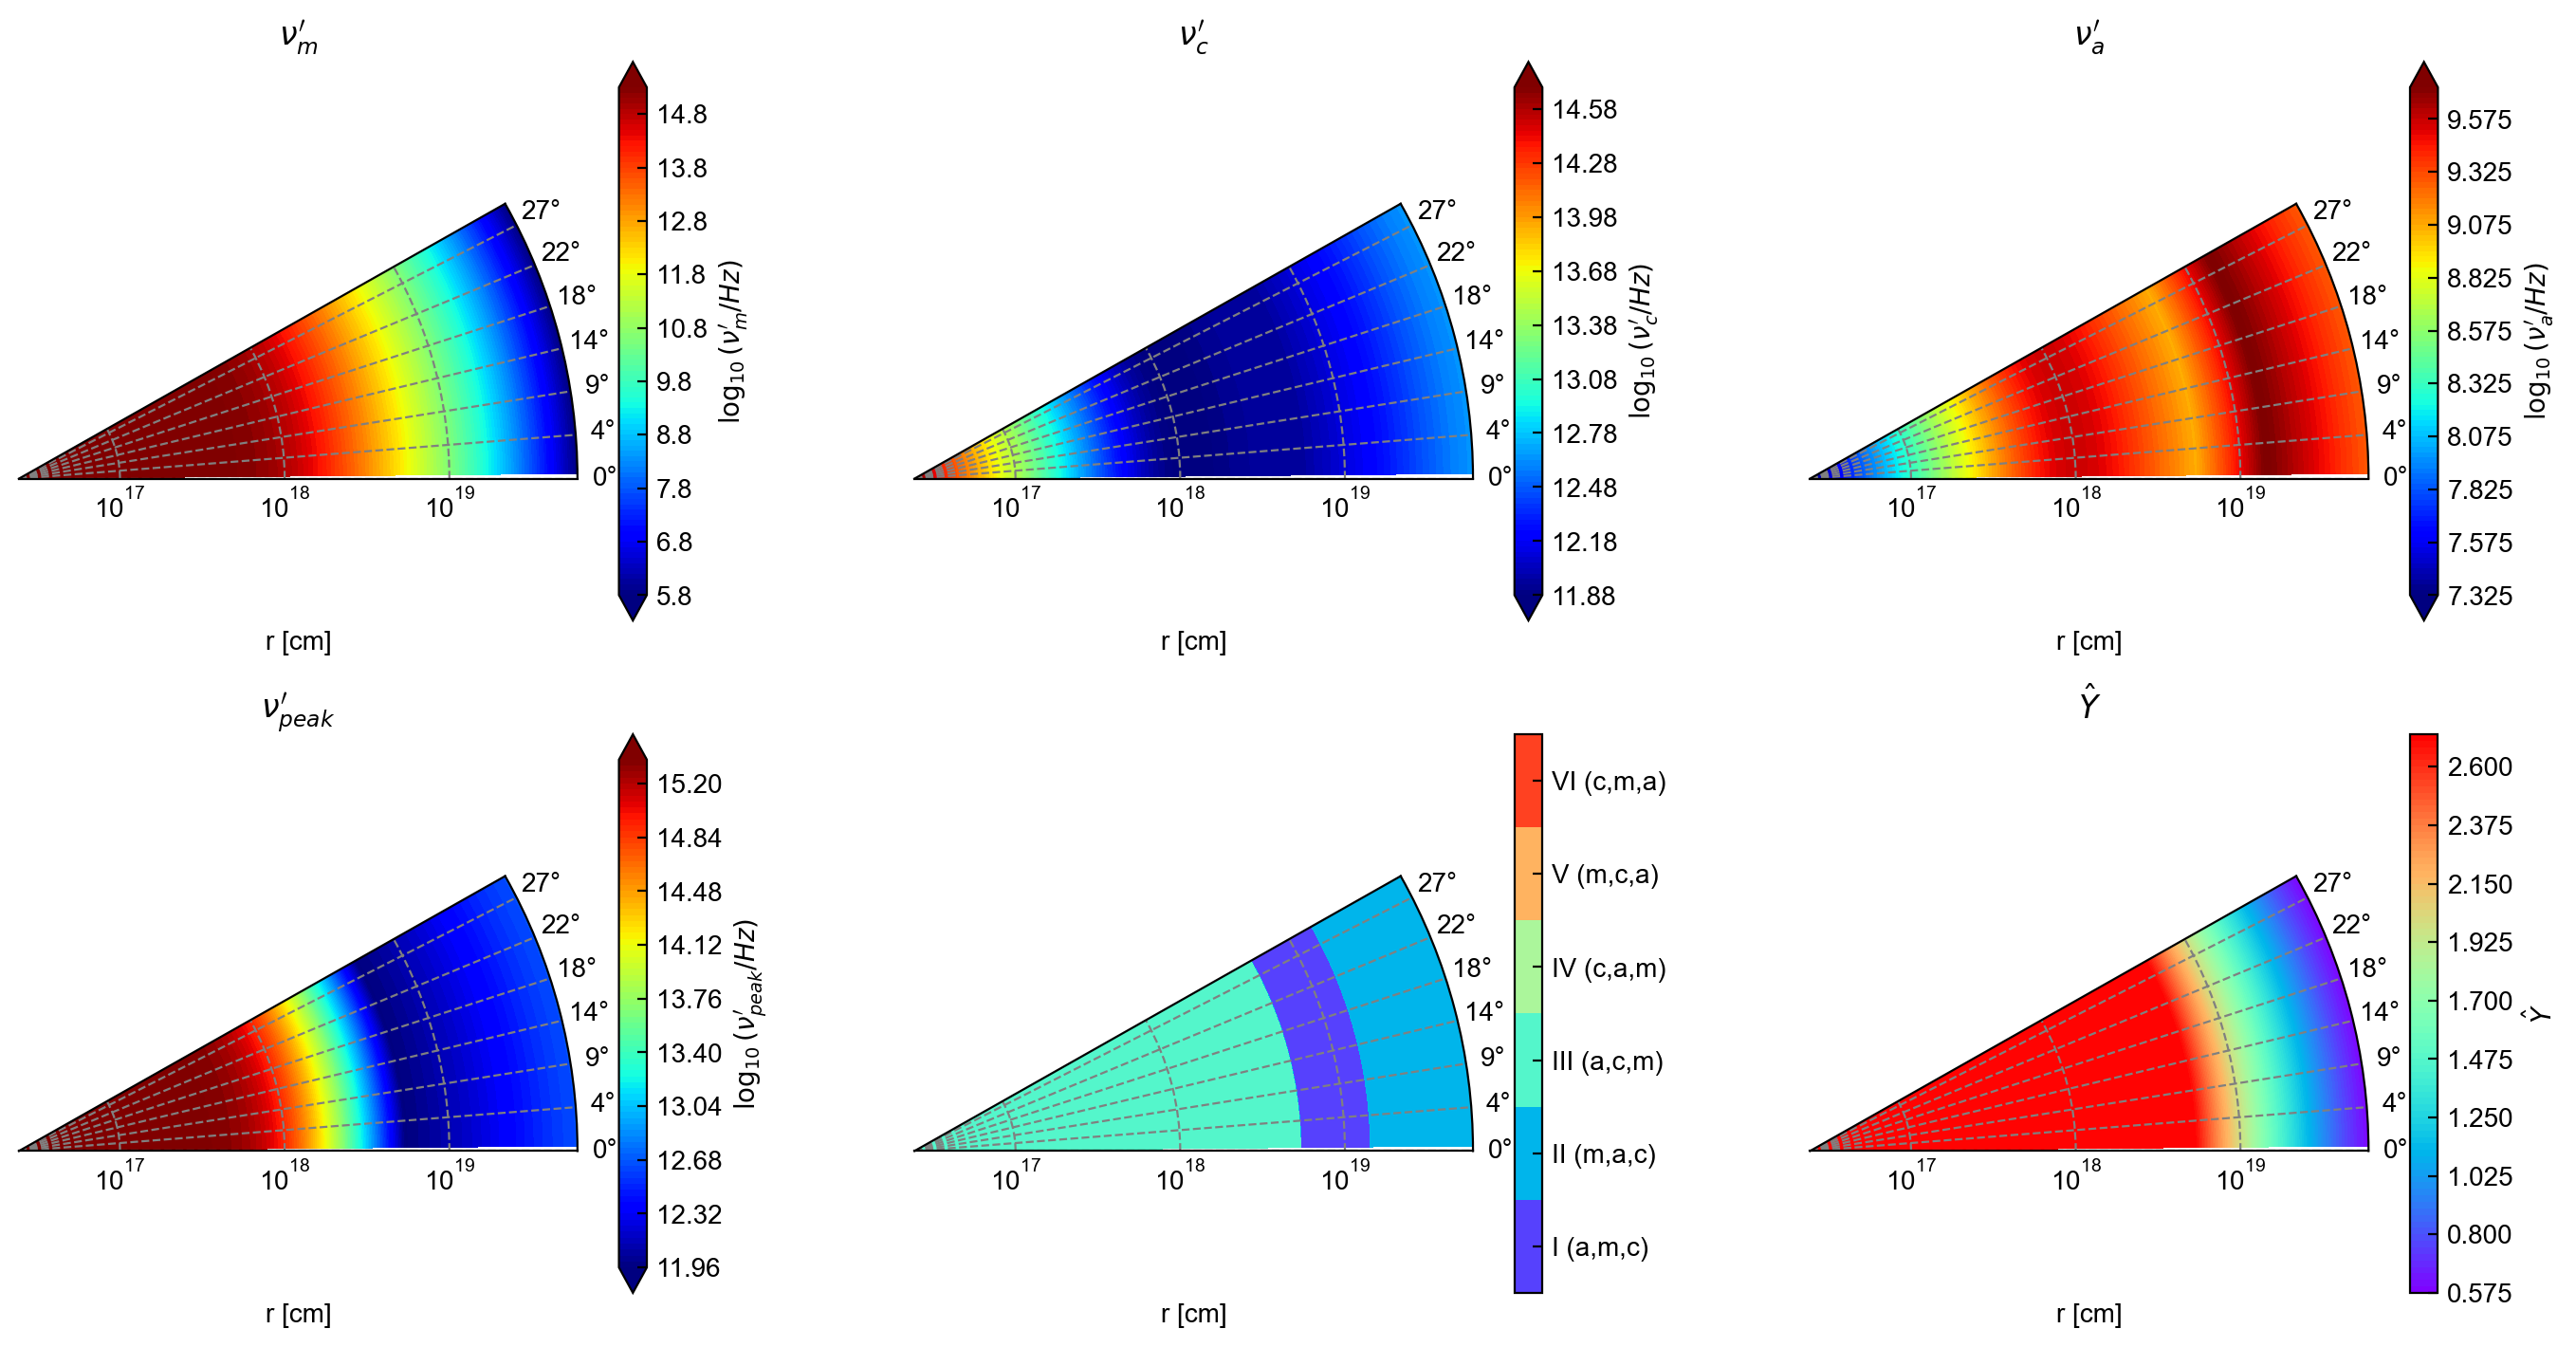

In [529]:
show_syn_nv(prefix+'coord_r.txt', prefix+'coord_theta.txt','_ICKN',30)

In [535]:
def show_syn_gamma(r_name, theta_name, x,zoom):
    r1d = np.loadtxt(r_name) * 1.5e13
    theta1d = np.loadtxt(theta_name)*zoom

    r, theta = np.meshgrid(r1d, theta1d)
    
    gamma_m = np.loadtxt(prefix+'electron_ICKN'+x+'_gamma_m.txt')
    gamma_c = np.loadtxt(prefix+'electron_ICKN'+x+'_gamma_c.txt')
    gamma_a = np.loadtxt(prefix+'electron_ICKN'+x+'_gamma_a.txt')
    n_tot = np.loadtxt(prefix+'electron_ICKN'+x+'_n_tot.txt')
    Y = np.loadtxt(prefix+'Y_ICKN'+x+'.txt')
    fig = plt.figure(figsize=(3*4.8, 2*3.6))

    min_gamma = min(gamma_m.min(),gamma_c.min(),gamma_a.min())
    max_gamma = max(gamma_m.max(),gamma_c.max(),gamma_a.max())

    axs = [ fig.add_subplot(2,3,i+1,projection='polar') for i in range(6)]
    for ax, gamma, name in zip(axs, [gamma_m, gamma_c, gamma_a, n_tot], ['\\gamma^\\prime_m', '\\gamma^\\prime_c', '\\gamma^\\prime_a', 'n^\prime_{tot}']):
        lv = np.linspace(np.log10(min_gamma),np.log10(max_gamma),100)
        cs = ax.contourf(theta, r, (gamma), levels=100, cmap = 'jet',extend='both')
        ax.set_xlim(0, theta1d[-1])
        ax.set_xlabel('r [cm]')
        cbar =plt.colorbar(cs)
        cbar.set_label('$'+name+'$')
        ax.set_yscale('log')
        ax.set_title('$'+name+'$')

    I = (gamma_a <= gamma_m) & (gamma_m <= gamma_c)
    II = (gamma_m <= gamma_a) & (gamma_a <= gamma_c)
    III = (gamma_a <= gamma_c) & (gamma_c <= gamma_m)
    IV = (gamma_c <= gamma_a) & (gamma_a <= gamma_m)
    V = (gamma_m <= gamma_c) & (gamma_c <= gamma_a)
    VI = (gamma_c <= gamma_m) & (gamma_m <= gamma_a)
    regime = np.zeros_like(gamma_m)
    regime[I] = 1
    regime[II] = 2
    regime[III] = 3
    regime[IV] = 4
    regime[V] = 5
    regime[VI] = 6

    print(np.unique(regime))

    ax = axs[4]
    
    cs = ax.contourf(theta, r, regime, levels=[0.5,1.5,2.5,3.5,4.5,5.5,6.5], cmap = 'rainbow')
    ax.set_xlim(0, theta1d[-1])
    ax.set_xlabel('r [cm]')
    cbar =plt.colorbar(cs, ticks=[1,2,3,4,5,6])
    cbar.ax.set_yticklabels(['I (a,m,c)', 'II (m,a,c)', 'III (a,c,m)','IV (c,a,m)','V (m,c,a)','VI (c,m,a)']) 
    ax.set_yscale('log')

    ax = axs[5]

    #cs = ax.contourf(theta, r, Y, levels=np.logspace(-3,1,100), cmap = 'rainbow',norm = mpl.colors.LogNorm(),extend='both')
    cs = ax.contourf(theta, r, Y, levels=100, cmap = 'rainbow')
    ax.set_xlim(0, theta1d[-1])
    ax.set_xlabel('r [cm]')
    #cbar =plt.colorbar(cs,ticks=[1e-3,1e-2,1e-1,1e0,1e1,1e2])
    cbar =plt.colorbar(cs)
    cbar.set_label(r'$\hat{Y}$')
    ax.set_yscale('log')
    ax.set_title('$\hat{Y}$')

    plt.tight_layout()
    plt.savefig(prefix+x+'gamma.png', dpi=300, bbox_inches='tight')



[1. 2. 3.]


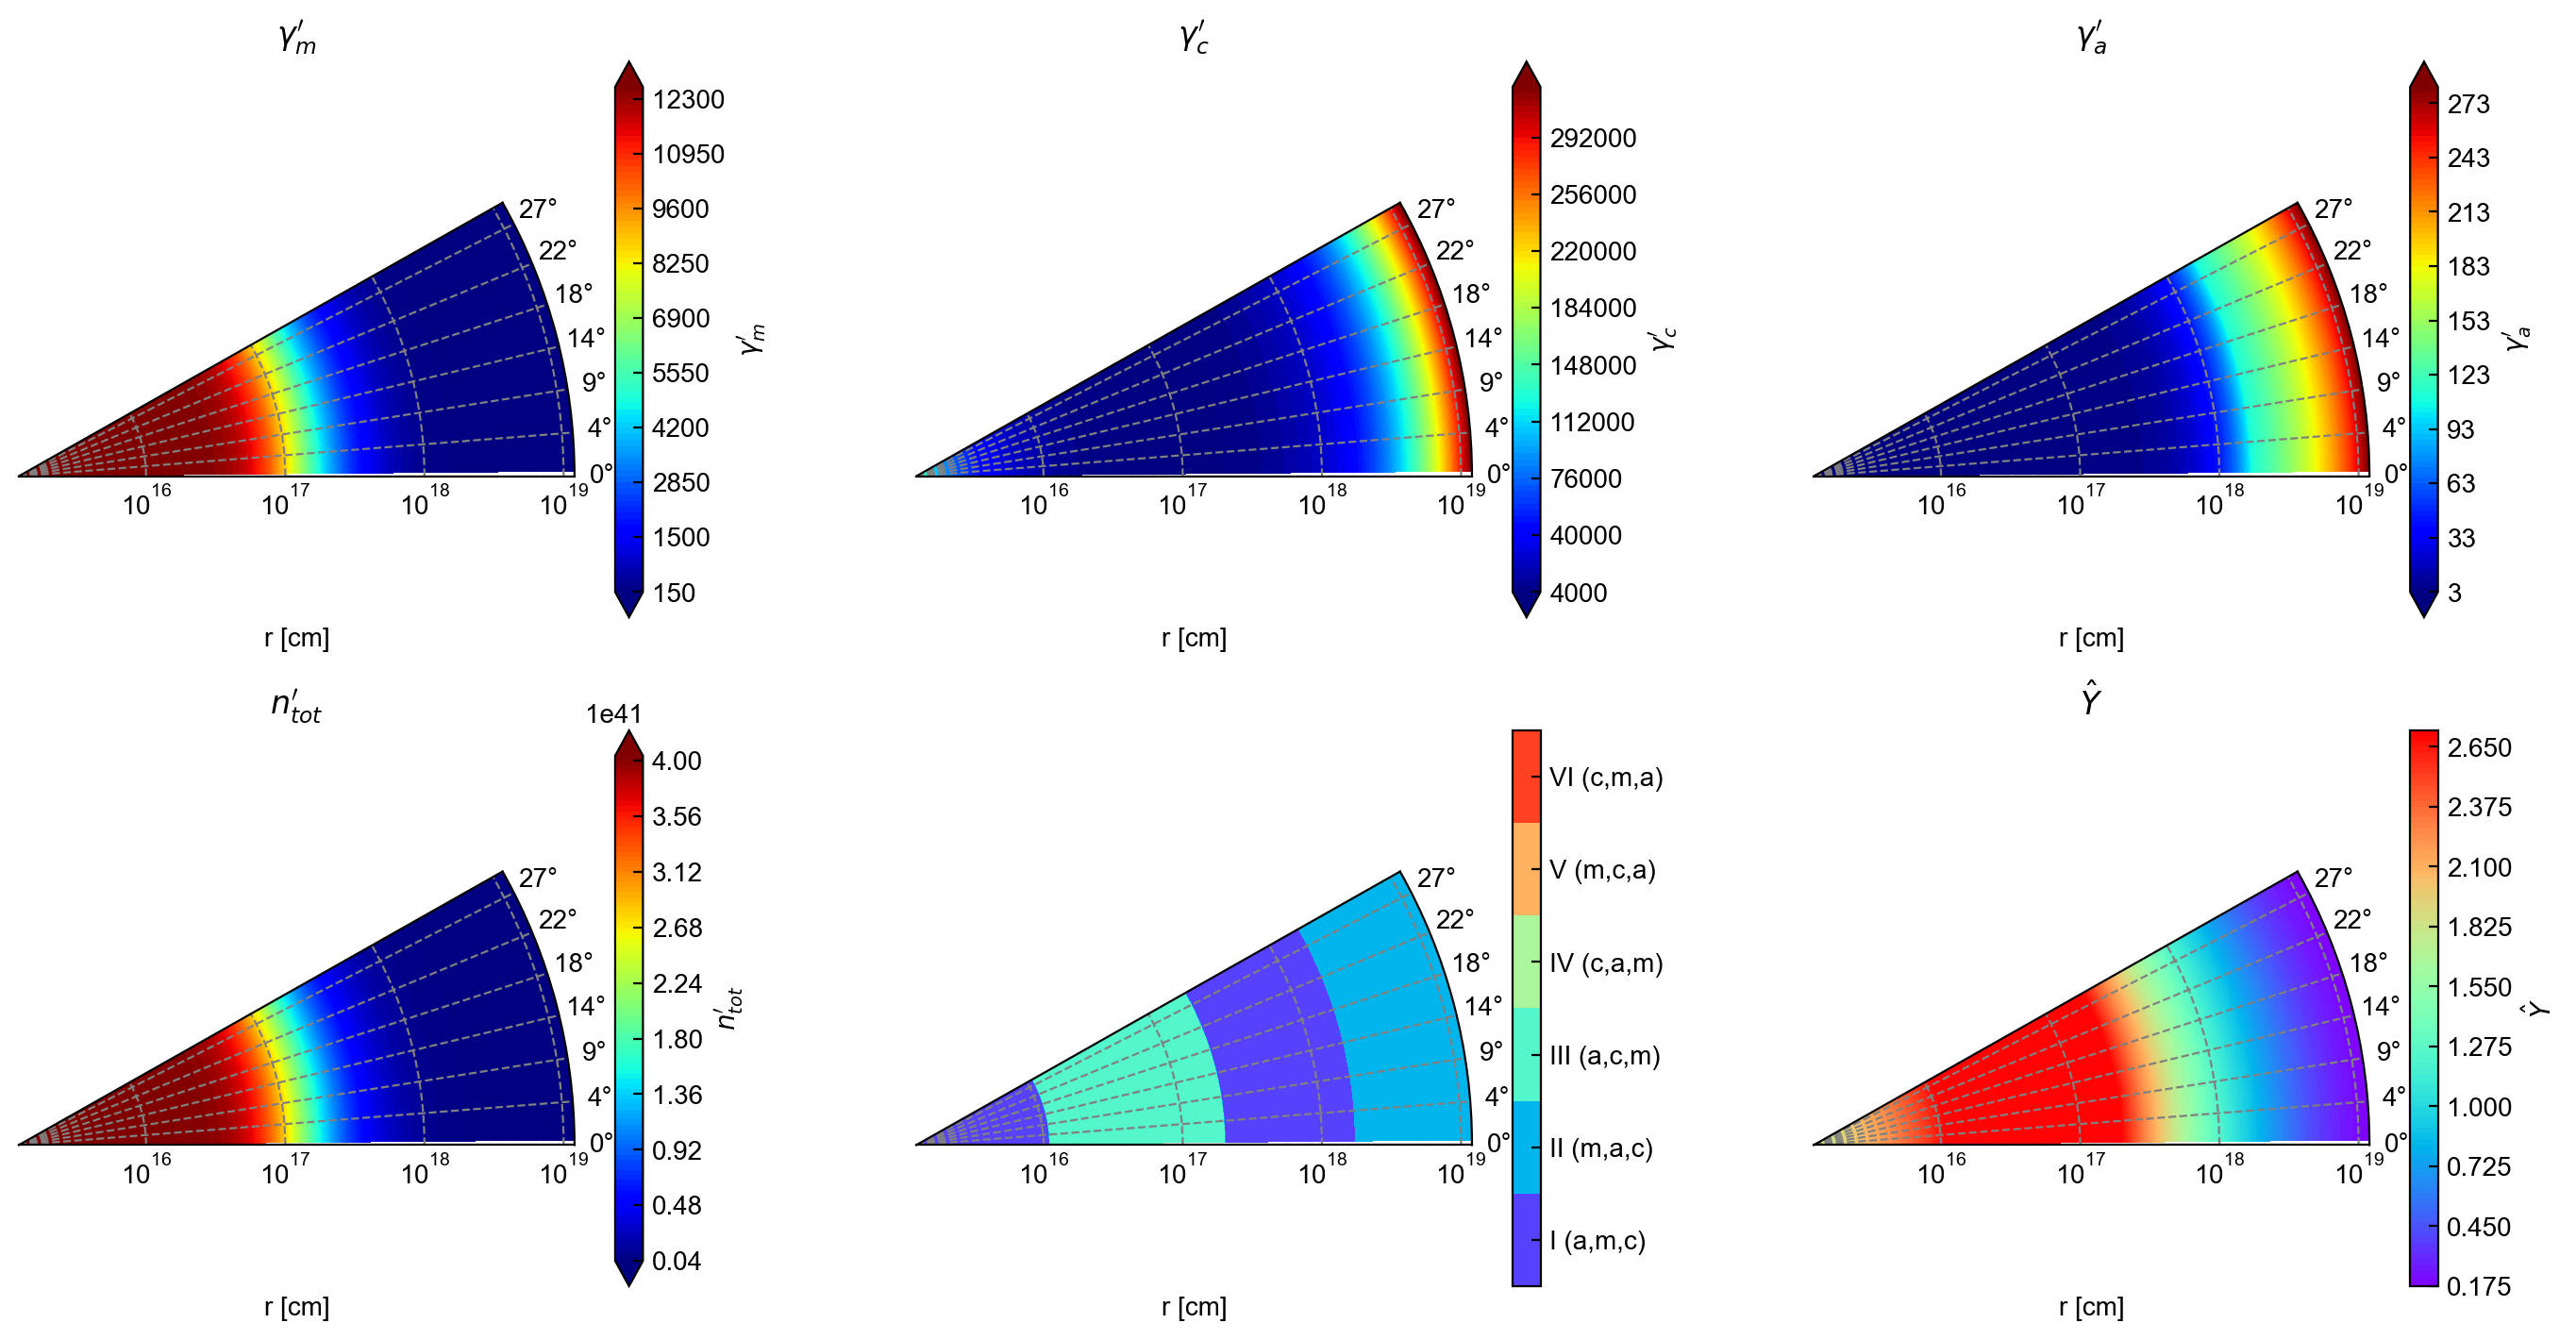

In [536]:
show_syn_gamma(prefix+'coord_r.txt', prefix+'coord_theta.txt','',30)

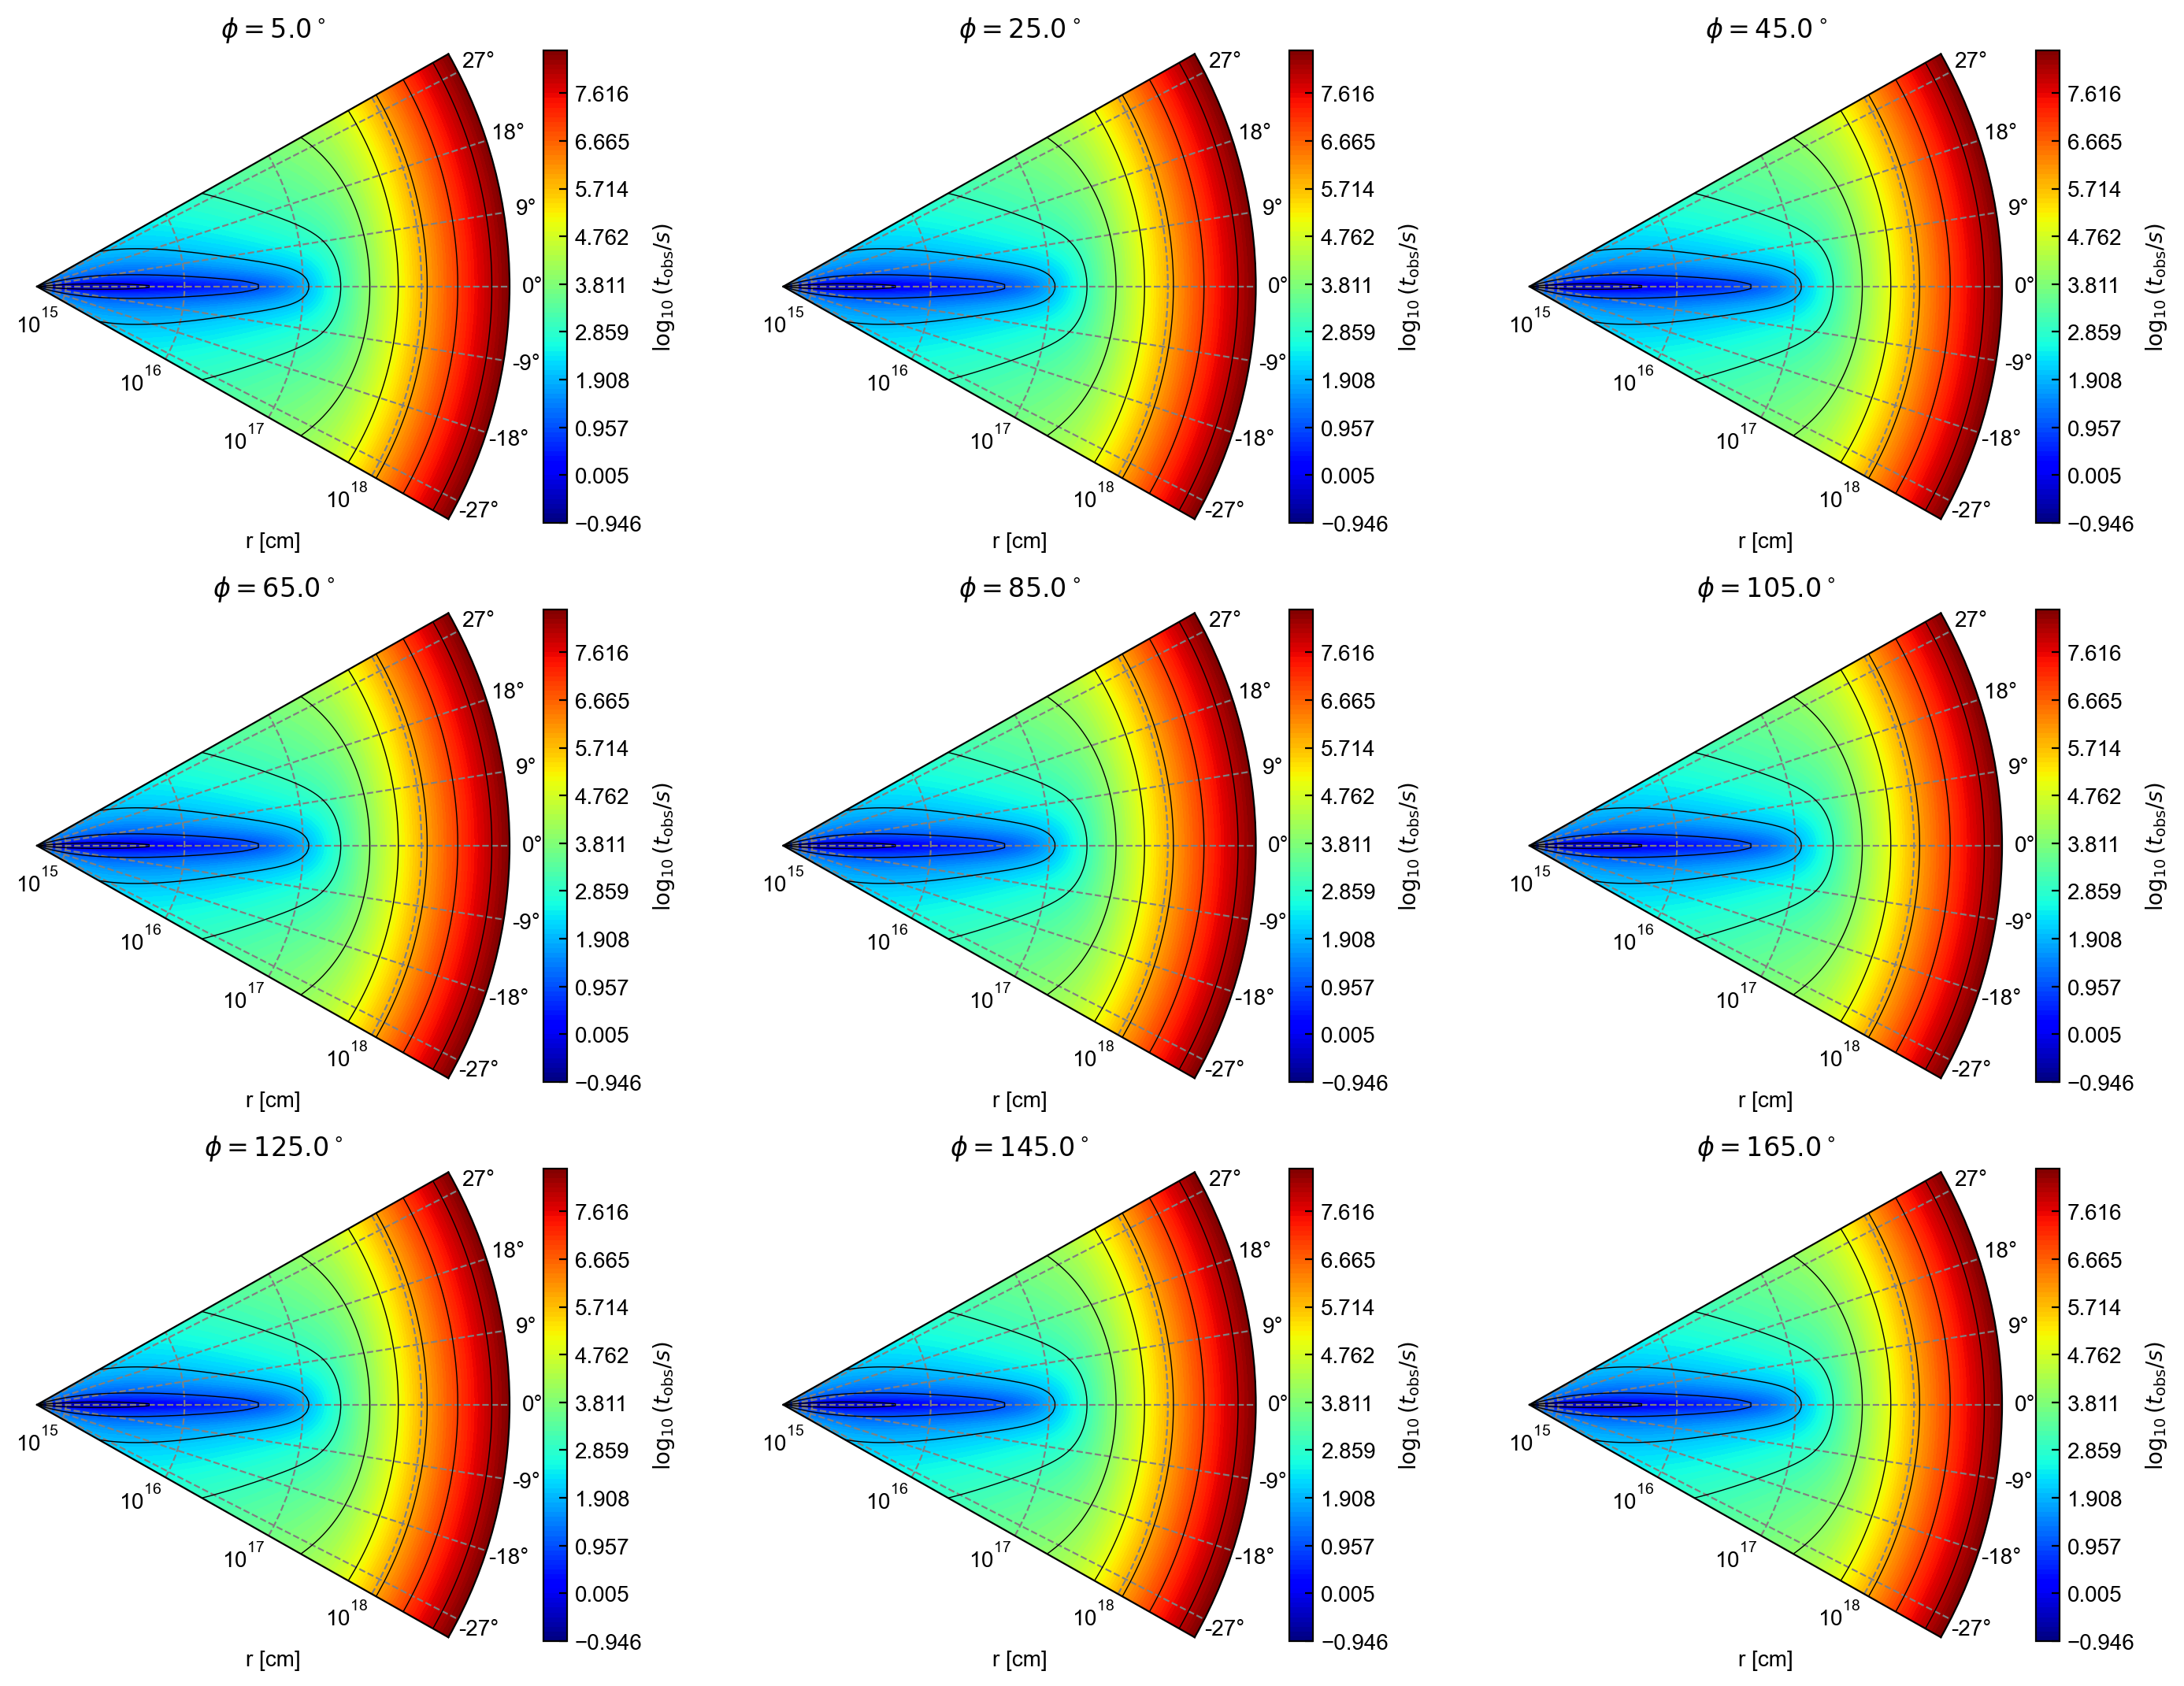

In [671]:
def draw_t_obs(r_name, theta_name, phi_name, var_name,zoom):
    r1d = np.loadtxt(r_name) * 1.5e13
    theta1d = np.loadtxt(theta_name)*zoom
    phi1d = np.loadtxt(phi_name)

    d = np.loadtxt(var_name)*500

    theta_ext = np.hstack([-theta1d[::-1], theta1d])

    fig = plt.figure(figsize=(4.8*3, 3.6*3))

    axs = [fig.add_subplot(3, 3, i+1,projection='polar') for i in range(int(len(phi1d)/4))]
    
    for i, ax in zip(range(int(len(phi1d)/4)), axs):
        i = i*2
        j = i + int(len(phi1d)/2)
        var1 = d[(j*len(theta1d)):(j+1)*len(theta1d),:]
        var2 = d[(i*len(theta1d)):(i+1)*len(theta1d),:]

        r, theta = np.meshgrid(r1d, theta_ext)

        var1 =np.flip(var1, axis=0)
        var = np.vstack([var1, var2])

        cs = ax.contourf(theta, r, np.log10(var), levels = np.linspace(np.log10(d[d>0]).min(),np.log10(d.max()),100), cmap = 'jet')
        cl=ax.contour(theta, r, np.log10(var), levels = 10, colors = 'black', linewidths = 0.5)

        ax.set_title('$\\phi = {:.1f}^\\circ$'.format(phi1d[i]/np.pi*180))
        ax.set_xlim(-theta1d[-1], theta1d[-1])
        ax.set_xlabel('r [cm]')
        cbar = plt.colorbar(cs)
        cbar.set_label('$\\log_{10}(t_{\\rm obs}/s)$')
        ax.set_yscale('log')
    plt.tight_layout()
    plt.savefig(prefix+'t_obs.png', dpi=300, bbox_inches='tight')
    
draw_t_obs(prefix+'r.txt', prefix+'theta.txt', prefix+'phi.txt', prefix+'t_obs.txt',10)

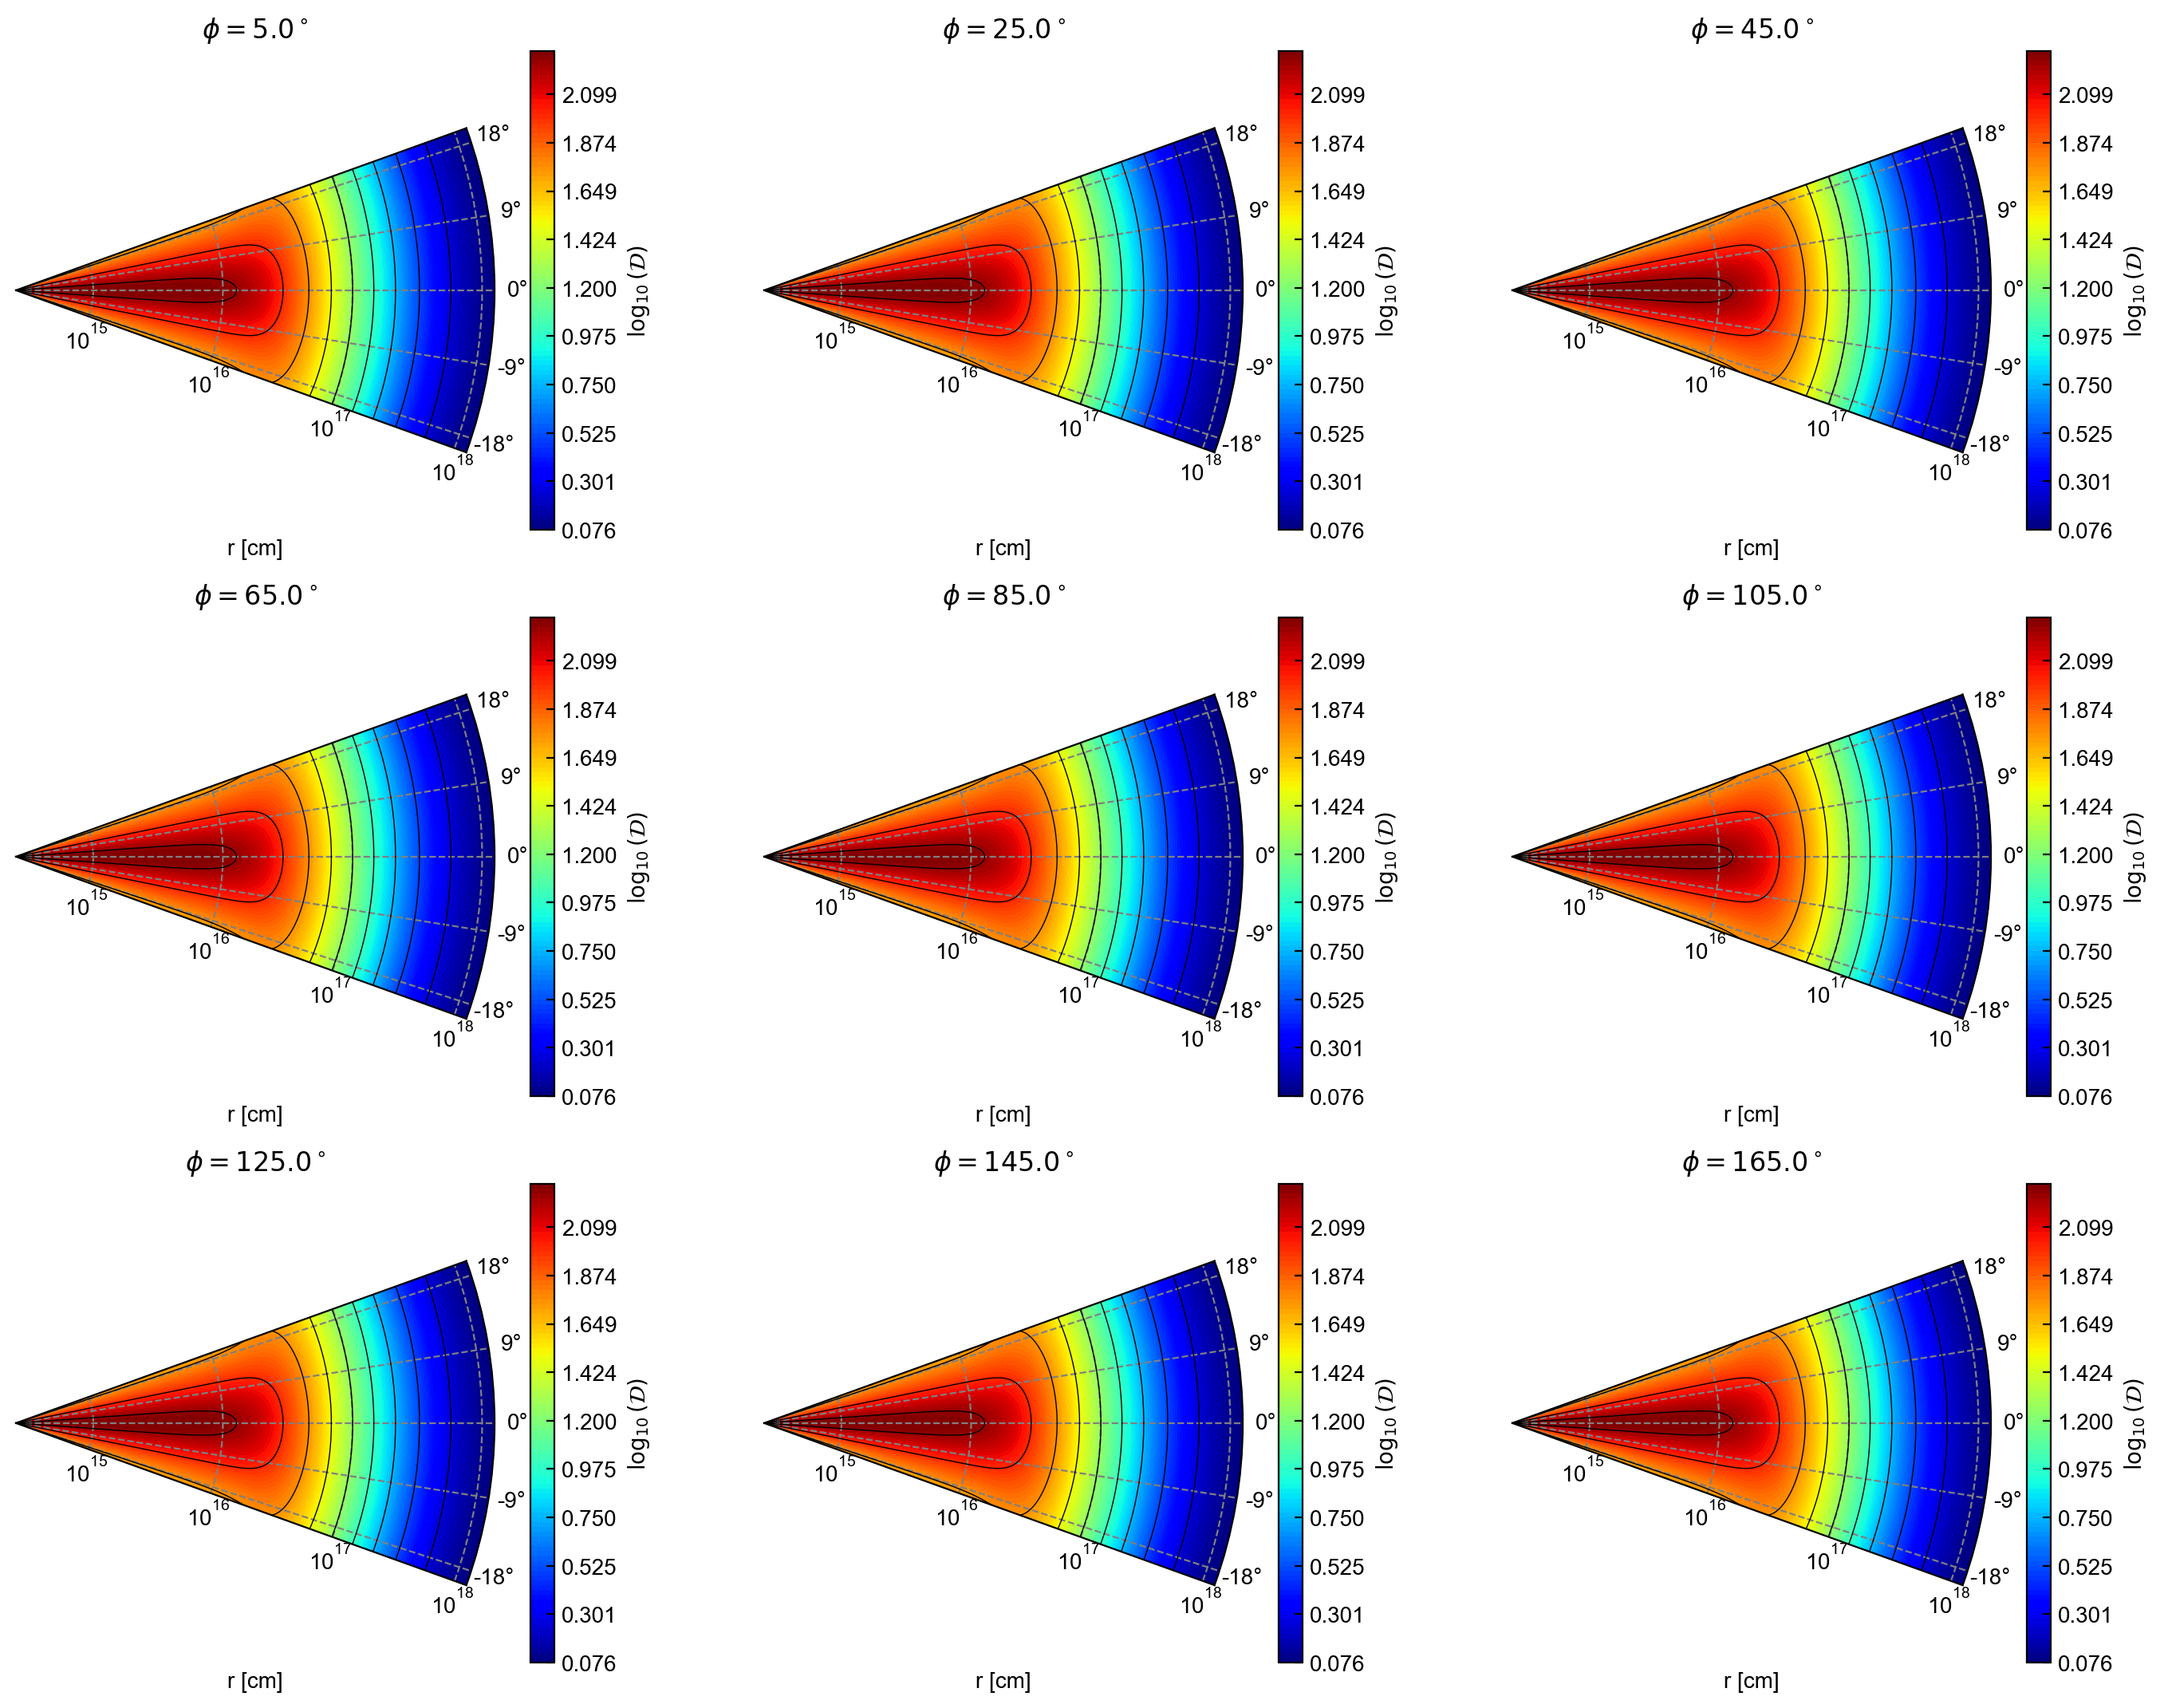

In [753]:
def draw_D(r_name, theta_name, phi_name, var_name, zoom):
    r1d = np.loadtxt(r_name) * 1.5e13
    theta1d = np.loadtxt(theta_name)*zoom
    phi1d = np.loadtxt(phi_name)

    d = np.loadtxt(var_name)
    d=d

    theta_ext = np.hstack([-theta1d[::-1], theta1d])

    fig = plt.figure(figsize=(4.8*3, 3.6*3))

    axs = [fig.add_subplot(3, 3, i+1,projection='polar') for i in range(int(len(phi1d)/4))]
    
    for i, ax in zip(range(int(len(phi1d)/4)), axs):
        i = i*2
        j = i + int(len(phi1d)/2)

        var1 = d[(j*len(theta1d)):(j+1)*len(theta1d),:]
        var2 = d[(i*len(theta1d)):(i+1)*len(theta1d),:]

        r, theta = np.meshgrid(r1d, theta_ext)

        var1 =np.flip(var1, axis=0)
        var = np.vstack([var1, var2])

        cs = ax.contourf(theta, r, np.log10(var), levels = np.linspace(np.log10(d[d>0]).min(),np.log10(d.max()),100), cmap = 'jet')
        cl=ax.contour(theta, r, np.log10(var), levels = 10, colors = 'black', linewidths = 0.5)

        ax.set_title('$\\phi = {:.1f}^\\circ$'.format(phi1d[i]/np.pi*180))
        ax.set_xlim(-theta1d[-1], theta1d[-1])
        ax.set_xlabel('r [cm]')
        cbar = plt.colorbar(cs)
        cbar.set_label('$\\log_{10}(\\mathcal{D})$')
        ax.set_yscale('log')
    plt.tight_layout()
    plt.savefig(prefix+'D.png', dpi=300, bbox_inches='tight')
    
draw_D(prefix+'r.txt', prefix+'theta.txt', prefix+'phi.txt', prefix+'doppler.txt',20)

/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_21790/1876596306.py:41: RuntimeWarning: divide by zero encountered in log10
  cs = ax.contourf(theta, r, np.log10(var), levels = np.linspace(np.log10(d[d>0]).min(),np.log10(d.max()),100), cmap = 'jet')
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_21790/1876596306.py:42: RuntimeWarning: divide by zero encountered in log10
  cl = ax.contour(theta, r, np.log10(var), levels = 10, colors = 'black', linewidths = 0.5)


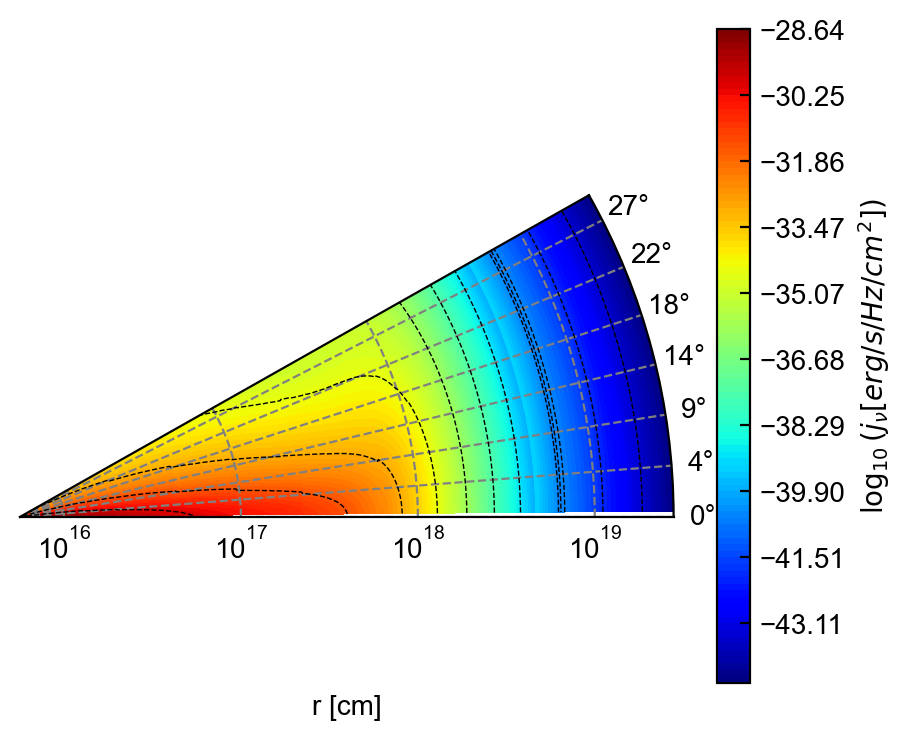

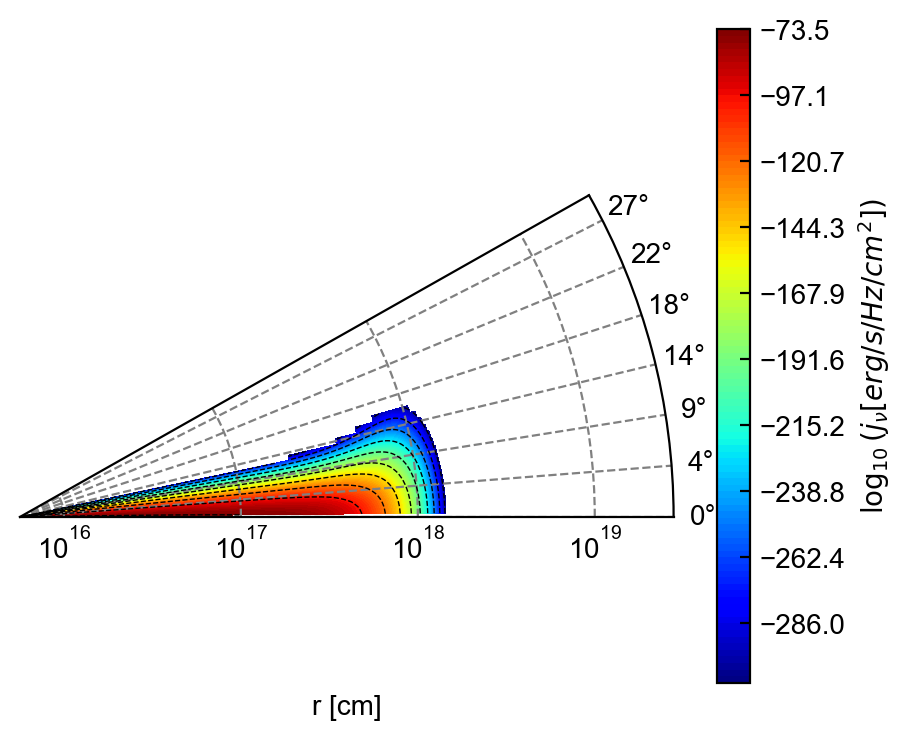

In [370]:
def draw_intensity(r_name, theta_name, phi_name, var_name, zoom):
    r1d = np.loadtxt(r_name) * 1.5e13
    theta1d = np.loadtxt(theta_name)*zoom
    phi1d = np.loadtxt(phi_name)

    d = np.loadtxt(var_name+'.txt')*2e33*(1.5e13/500)**2/500/(1.5e13)**3

    theta_ext = np.hstack([-theta1d[::-1], theta1d])

    fig = plt.figure(figsize=(4.8*3, 3.6*3))

    size = phi1d.size
    if int(size/4) ==0:
        size1 = 1
        size2 = 1
    else:
        size1 = int(size/4)
        size2 = int(size/2)

    axs = [fig.add_subplot(3, 3, i+1,projection='polar') for i in range(size1)]
    
    for i, ax in zip(range(size1), axs):
        i = i*2
        j = i + size2
       
        var1 = d[(j*len(theta1d)):(j+1)*len(theta1d),:]
        var2 = d[(i*len(theta1d)):(i+1)*len(theta1d),:]

        

        var1 =np.flip(var1, axis=0)
        if size1 == 1:
            var = var2
            theta_ext = theta1d
           
            
        else:
            var = np.vstack([var1, var2])
        r, theta = np.meshgrid(r1d, theta_ext)

        cs = ax.contourf(theta, r, np.log10(var), levels = np.linspace(np.log10(d[d>0]).min(),np.log10(d.max()),100), cmap = 'jet')
        cl = ax.contour(theta, r, np.log10(var), levels = 10, colors = 'black', linewidths = 0.5)

        if size1 > 1:
            ax.set_title('$\\phi = {:.1f}^\\circ$'.format(phi1d[i]/np.pi*180))
            ax.set_xlim(-theta1d[-1], theta1d[-1])
        else:
            ax.set_xlim(0, theta1d[-1])
        ax.set_xlabel('r [cm]')
        cbar = plt.colorbar(cs)
        cbar.set_label('$\\log_{10}(j_\\nu [erg/s/Hz/cm^2])$')
        ax.set_yscale('log')
    plt.tight_layout()
    plt.savefig(var_name+'.png', dpi=300, bbox_inches='tight')
    
draw_intensity(prefix+'coord_r.txt', prefix+'coord_theta.txt', prefix+'coord_phi.txt', prefix+'j_nu_IC27',30)
draw_intensity(prefix+'coord_r.txt', prefix+'coord_theta.txt', prefix+'coord_phi.txt', prefix+'j_nu_syn27',30)
#draw_intensity(prefix+'coord_r.txt', prefix+'coord_theta.txt', prefix+'coord_phi.txt', prefix+'j_nu_IC20',30)
#draw_intensity(prefix+'coord_r.txt', prefix+'coord_theta.txt', prefix+'coord_phi.txt', prefix+'j_nu_IC27',30)

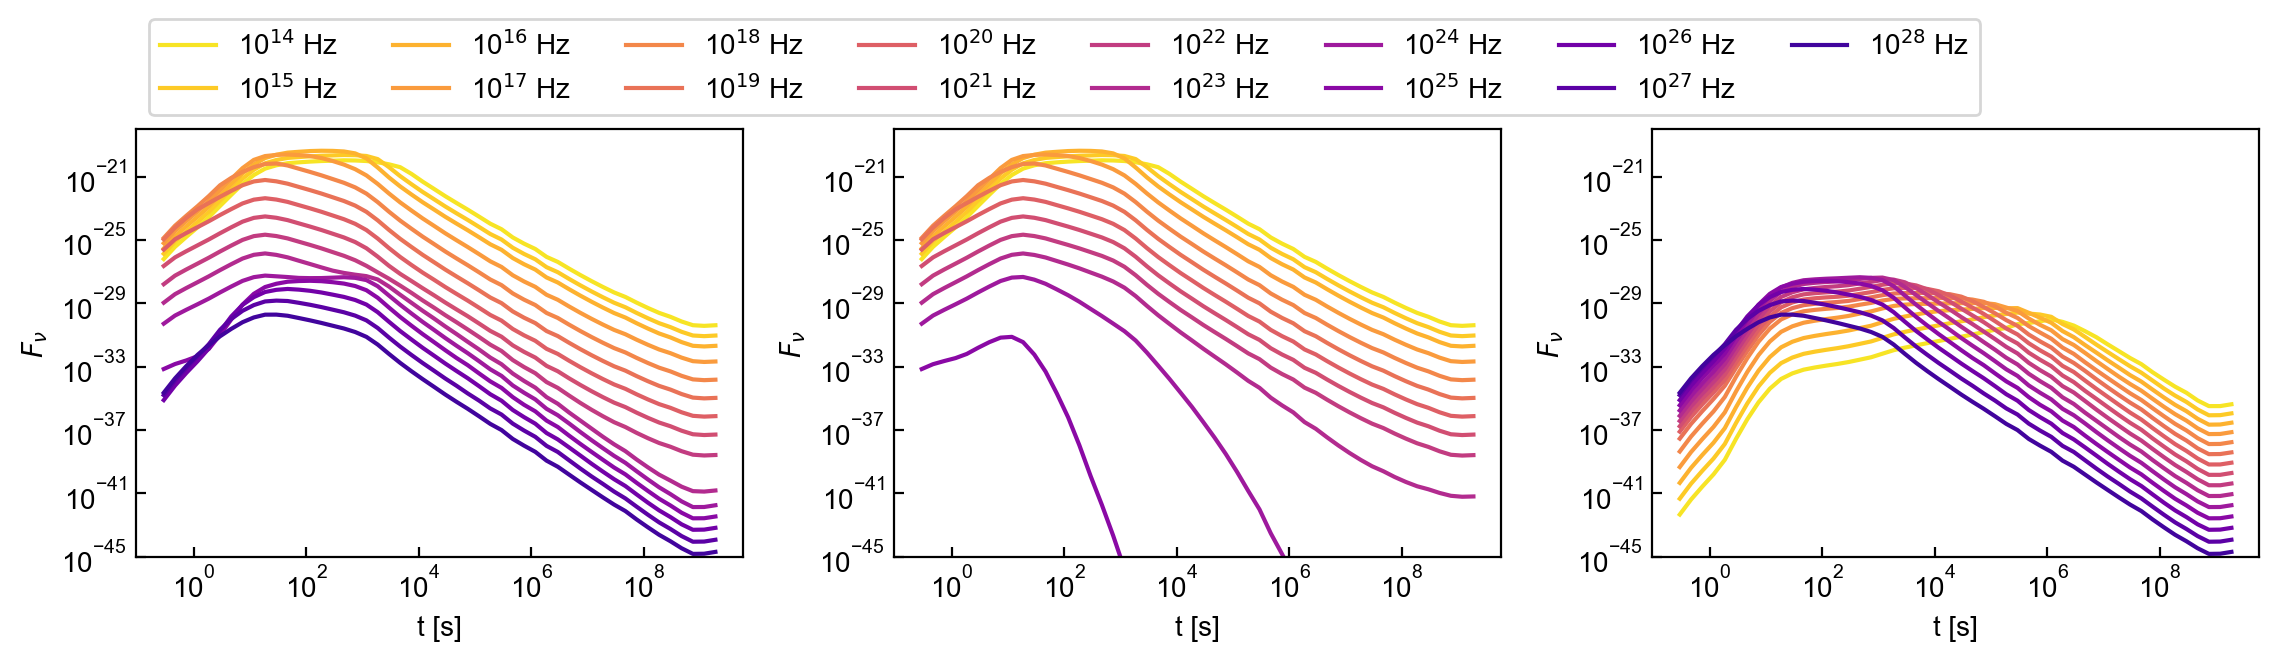

In [14]:
def calc_LC(freqs, names):
    p = 2.3
    
    fig = plt.figure(figsize=(4.8*0.8*len(names), 3.6*0.8))
    axs = [fig.add_subplot(1,len(names),i+1) for i in range(len(names))]
    
    for L_name , ax  in zip(names, axs):
        d = np.loadtxt(prefix+'F_nu'+L_name+'.txt')
        colors = cm.plasma(np.linspace(0.95, 0.1, len(freqs)))
        #colors = cm(np.linspace(0.2, 0.9, len(freqs)))
        for i, f, c in zip(range(len(freqs)),freqs,colors):
            t = d[0,:]*500
            Fnu = d[i+1,:]*2e33*(1.5e13/500)**2/(1.5e13)**2
            #ax = axx
            ax.plot(t, Fnu*(10**(0*i)),c=c,label = '10$^{'+str(f) + '}$ Hz')
            ax.set_ylim(1e-45,1e-18)
            ax.set_xscale('log')
            ax.set_yscale('log')

            ax.set_xlabel('t [s]')
            ax.set_ylabel('$ F_{\\nu} $')
    
    #ax.plot(t, 1e3*t**(-3*(p-1)/4),ls='--',label = '$t^{-3(p-1)/4}$',c='r')
    #ax.plot(t, 1e3*t**(-(3*p-2)/4),ls=':',label = '$t^{-(3p-2)/4}$',c='r')
    #ax.plot(t, 1e3*t**0.5,ls='-',label = '$t^{1/2}$',c='r')

    #ax.plot(t, 1e3*t**(-3*(p)/4),ls='--',label = '$t^{-3p/4}$',c='b')
    #ax.plot(t, 1e3*t**(-(3*p+1)/4),ls=':',label = '$t^{-(3p+1)/4}$',c='b')
    #ax.plot(t, 1e3*t**-0.25,ls='-',label = '$t^{-1/4}$',c='b')
    
    plt.tight_layout()
    plt.legend(ncol=8,loc='lower left',fontsize=10 , bbox_to_anchor=(-2.5,1) )
    plt.savefig(prefix+'LC.png', dpi=300, bbox_inches='tight')
    #plt.xlim(0,1e6)
    
calc_LC([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],['_tot','_syn','_IC'])

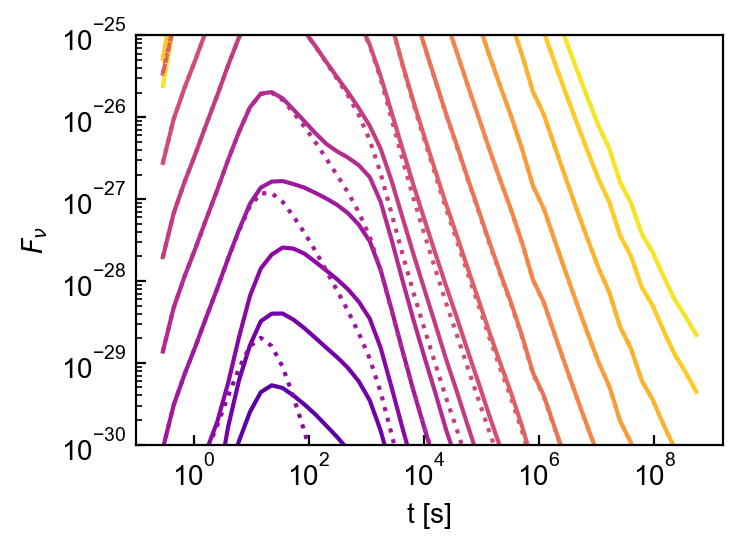

In [663]:
def calc_tot_LC(freqs, names):
    p = 2.3
    
    fig = plt.figure(figsize=(4.8*0.8, 3.6*0.8))
    ax = fig.add_subplot(1,1,1)
    ls = ['-',':']
    for L_name, l  in zip(names, ls):
        d = np.loadtxt(prefix+'F_nu'+L_name+'.txt')
        colors = cm.plasma(np.linspace(0.95, 0.1, len(freqs)))
        #colors = cm(np.linspace(0.2, 0.9, len(freqs)))
        for i, f, c in zip(range(len(freqs)),freqs,colors):
            t = d[0,:]*500
            Fnu = d[i+1,:]*2e33*(1.5e13/500)**2/(1.5e13)**2
            #ax = axx
            ax.plot(t, Fnu*(10**(0*i)),c=c,label = '10$^{'+str(f) + '}$ Hz',ls=l)
            #ax.set_ylim(1e-40,1e-13)
            ax.set_ylim(1e-30,1e-25)
            ax.set_xscale('log')
            ax.set_yscale('log')

            ax.set_xlabel('t [s]')
            ax.set_ylabel('$ F_{\\nu} $')
    
    #ax.plot(t, 1e3*t**(-3*(p-1)/4),ls='--',label = '$t^{-3(p-1)/4}$',c='r')
    #ax.plot(t, 1e3*t**(-(3*p-2)/4),ls=':',label = '$t^{-(3p-2)/4}$',c='r')
    #ax.plot(t, 1e3*t**0.5,ls='-',label = '$t^{1/2}$',c='r')

    #ax.plot(t, 1e3*t**(-3*(p)/4),ls='--',label = '$t^{-3p/4}$',c='b')
    #ax.plot(t, 1e3*t**(-(3*p+1)/4),ls=':',label = '$t^{-(3p+1)/4}$',c='b')
    #ax.plot(t, 1e3*t**-0.25,ls='-',label = '$t^{-1/4}$',c='b')
    
    plt.tight_layout()
    #plt.legend(ncol=8,loc='lower left',fontsize=10 , bbox_to_anchor=(-2.5,1) )
    plt.savefig(prefix+'LC.png', dpi=300, bbox_inches='tight')
    #plt.xlim(0,1e6)
    
calc_tot_LC([14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],['_tot','_syn'])

In [10]:
def full_spectrum(ax, prefix, tname, fname,space, ls, cb):
    d = np.loadtxt(prefix+fname)
    t = np.loadtxt(prefix+tname)[0,:]*500
    nu = d[0,:]/500  
    w,h = d.shape
    num = 15
    #colors = cm.plasma(np.linspace(0.1, 0.9, num))
    interval = int((w-1)/num)

    norm = matplotlib.colors.LogNorm(
    vmin=np.min(t),
    vmax=np.max(t))

# choose a colormap
    c_m = matplotlib.cm.plasma

# create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

    for i in range(num):
        Lnu = d[i*interval+1,:]#/d[i*interval+1,:].max()
        #print(d[i*interval+1,:].max())
        ax.loglog(nu,10**(space*i)*nu* Lnu,c=c_m(norm((t[i*interval]))),lw=1,ls=ls)
        ax.loglog(nu, 1e-53*nu**3,ls='--',c='k',lw=0.5)
    #ax.loglog(nu, nu**(1.0/3))
    #ax.loglog(nu, 1e10*nu**(-(p-1)/2))
    #ax.loglog(nu, 1e25*nu**(-(p)/2))
    
    #ax.set_yticks([])
    if cb:
        cbar = plt.colorbar(s_m,ax=ax)
        cbar.set_label('$t_{\\rm obs}$ [s]')
    ax.set_xlabel(r'$\nu$ [Hz]')
    ax.set_ylabel('$\\log(\\nu^\prime F_{\\nu^\prime}$)')
    #ax.set_title(title)
    return s_m
    

(10000.0, 1e+42)

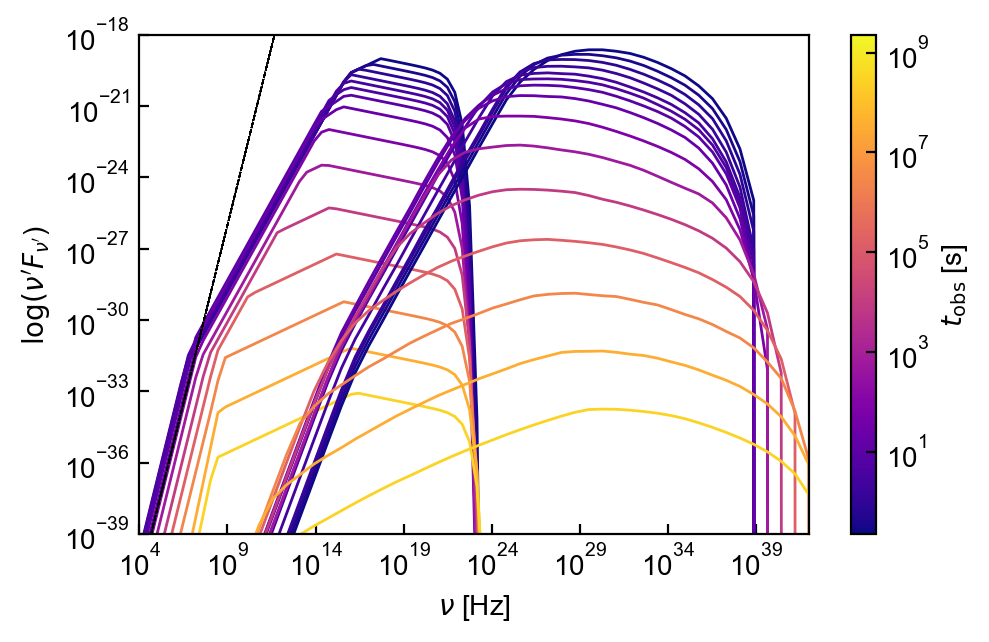

In [13]:
fig = plt.figure(figsize=(6*0.9, 3.6*0.9))
ax1 = fig.add_subplot(1,1,1)
full_spectrum(ax1, prefix,'t_obs.txt','syn_spectrum.txt',0,'-' ,False)
#ax1.set_ylim(1e-10,1e25)

full_spectrum(ax1, prefix,'t_obs.txt','IC_spectrum.txt',0, '-',True)
#ax2.set_ylim(1e-15,1e25)

ax1.set_ylim(1e-39,1e-18)
#ax1.set_ylim(1e-66,1e-31)
ax1.set_xlim(1e4,1e42)
#ax2 = fig.add_subplot(1,3,3)
#full_spectrum(ax2, prefix,'t_com.txt','syn_ICKN_spectrum.txt',1.3,'SSC Cooling with KN effect')
#ax2.set_ylim(1e-10,1e20)

#plt.savefig(prefix+'Syn_spectrum.pdf', dpi=300, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(6*0.9*3, 3.6*0.9))
ax1 = fig.add_subplot(1,3,1)
full_spectrum(ax1, prefix,'t_com.txt','IC_spectrum.txt',1.5,'Synchrotron Cooling')
ax1.set_ylim(1e-10,1e25)

ax2 = fig.add_subplot(1,3,2)
full_spectrum(ax2, prefix,'t_com.txt','IC_IC_spectrum.txt',1.5,'SSC')
ax2.set_ylim(1e-10,1e25)

ax2 = fig.add_subplot(1,3,3)
full_spectrum(ax2, prefix,'t_com.txt','IC_ICKN_spectrum.txt',1.5,'SSC with KN effect')
ax2.set_ylim(1e-10,1e25)

plt.savefig(prefix+'IC_spectrum.pdf', dpi=300, bbox_inches='tight')

In [646]:
def n_spectrum(ax, prefix, tname, fname,space, title, cb):
    d = np.loadtxt(prefix+fname)
    t = np.loadtxt(prefix+tname)[0,:]
    g = d[0,:]
    w,h = d.shape
    num = 15
    #colors = cm.plasma(np.linspace(0.1, 0.9, num))
    interval = int((w-1)/num)

    norm = matplotlib.colors.LogNorm(
    vmin=np.min(t),
    vmax=np.max(t))

# choose a colormap
    c_m = matplotlib.cm.plasma

# create a ScalarMappable and initialize a data structure
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

    for i in range(num):
        Lnu = d[i*interval+1,:]#/d[i*interval+1,:].max()
        #print(d[i*interval+1,:].max())
        ax.loglog(g,10**(space*i)* Lnu,c=c_m(norm((t[i*interval]))),lw=1)
        #ax.loglog(g,1e6*g**-2,'r')
        #ax1.loglog(g, g**(-2.3),'b')
        #ax1.loglog(g, 1e12*g**(-3.3),'g')
        p = 2.3
    #ax.loglog(nu, nu**2)
    #ax.loglog(nu, nu**(1.0/3))
    #ax.loglog(nu, 1e10*nu**(-(p-1)/2))
    #ax.loglog(nu, 1e25*nu**(-(p)/2))
        
        #ax.set_xscale('log')
    #ax.set_yticks([])
    if cb:
        cbar = plt.colorbar(s_m,ax=ax)
        cbar.set_label('$t_{\\rm obs}$ [s]')
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('$\\log(n_{\\gamma^\prime}$)')
    #ax.set_title(title)
    return s_m
    

In [1]:
fig = plt.figure(figsize=(4.8*0.9, 3.6*0.9))
ax1 = fig.add_subplot(1,1,1)
n_spectrum(ax1, prefix,'t_obs.txt','n_spectrum.txt',0,'Synchrotron photons',False)
ax1.set_ylim(1e20,1e40)

NameError: name 'plt' is not defined

/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_21790/2845069018.py:26: RuntimeWarning: divide by zero encountered in log10
  cs = ax.contourf(np.log10(n),np.log10(g),np.log10(z), levels=100, cmap = 'jet')


Text(0, 0.5, '$\\log_{10}(\\gamma_e)$')

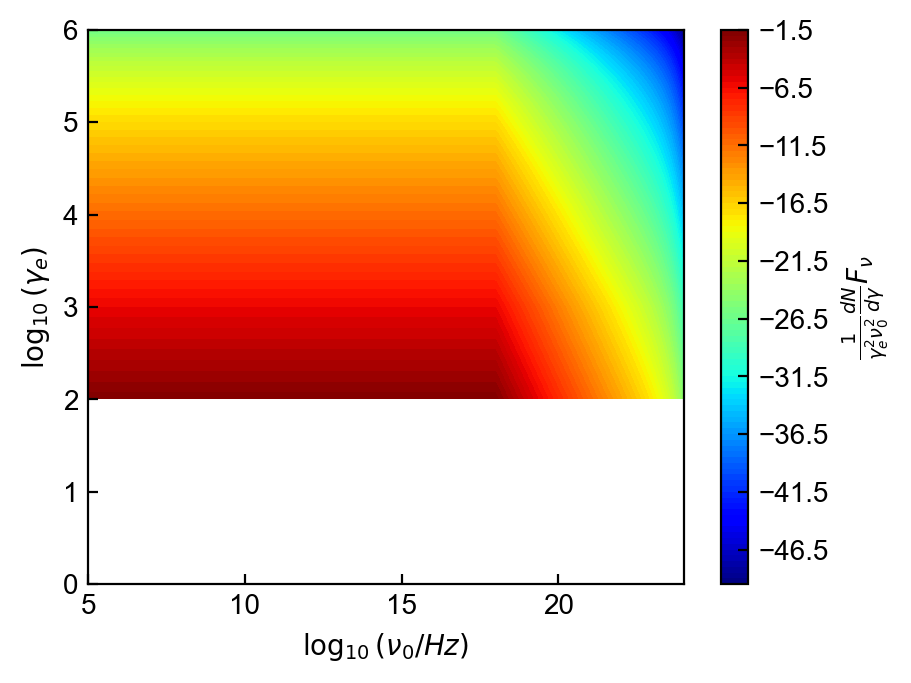

In [597]:

nu0 = np.logspace(5,24,500)
gamma = np.logspace(0,6,500)

n, g = np.meshgrid(nu0, gamma)
p = 2.3
N = np.zeros_like(n)
gp = 100
gc = 1000
gM = 1e5

N[g>=gc] = (g[g>=gc]/gc)**(-p-1)*np.exp(-g[g>=gc]/gM)
N[g<gc] = (g[g<gc]/gc)**(-p)
N[g<gp] =0

F = np.zeros_like(n)
nu_p = 1e18
nu_M = 1e23
F[n >= nu_p] = nu_p**2*(n[n>=nu_p]/nu_p)**(-p/2)
F[n < nu_p] = (n**2)[n<nu_p]
F = F*np.exp(-n/nu_M)
z = N*F/g/g/n/n


fig = plt.figure(figsize=(4.8, 3.6))
ax = fig.add_subplot(1,1,1)
cs = ax.contourf(np.log10(n),np.log10(g),np.log10(z), levels=100, cmap = 'jet')

cbar =plt.colorbar(cs)
cbar.set_label(r'$\frac{1}{\gamma_e^2 \nu_0^2}\frac{dN}{d\gamma}F_\nu$')

plt.xlabel(r'$\log_{10}(\nu_0/Hz)$')
plt.ylabel(r'$\log_{10}(\gamma_e)$')




In [525]:
ds = np.diff(g, axis=0)[:,0:-1]*np.diff(n, axis=1)[0:-1,:]

In [526]:
ic = np.logspace(5,32,1000)
g = g[0:-1,0:-1]
n = n[0:-1,0:-1]
z = z[0:-1,0:-1]
fs = []
for i in ic:
   select = (n*4*g*g > i) & (n<i)
   f = ((z*ds)[select]).sum()
   fs.append(f)


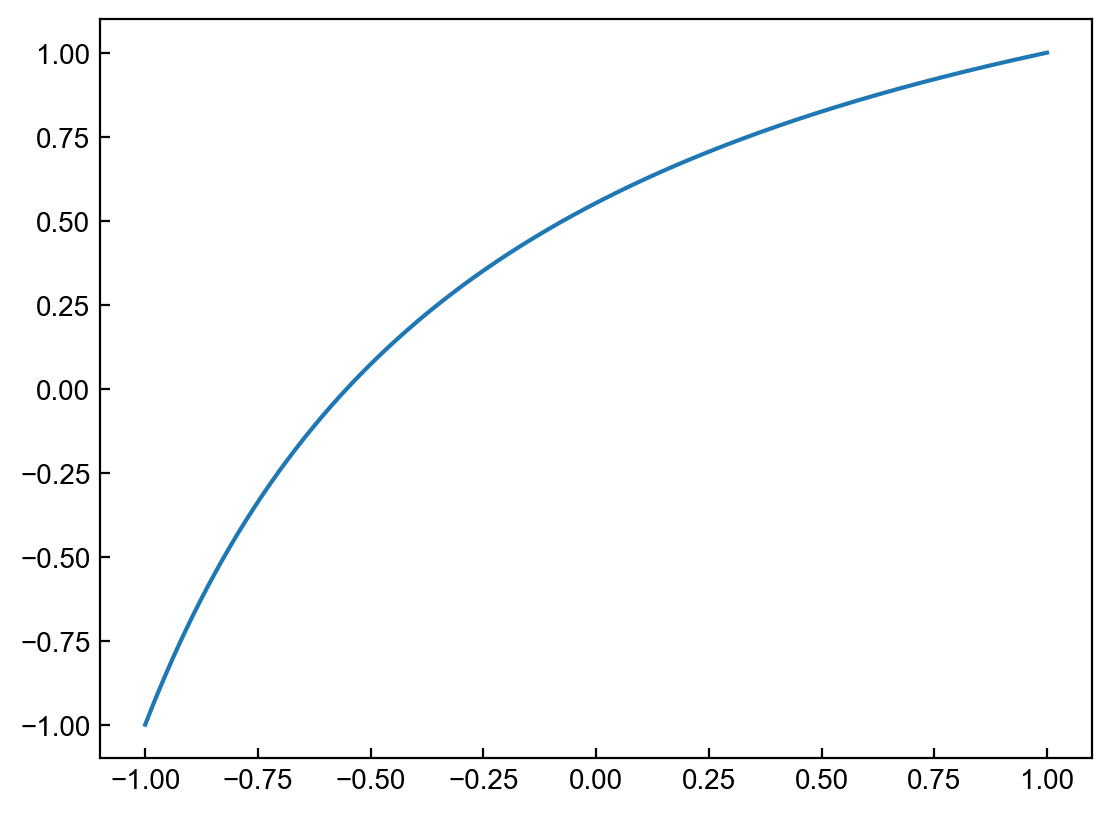

In [769]:
g = 1.2
b = np.sqrt((g*g-1)/g/g)

cos = np.linspace(-1,1,1000)

cos1 = (cos + b)/(1+b*cos)



plt.plot(cos,cos1)

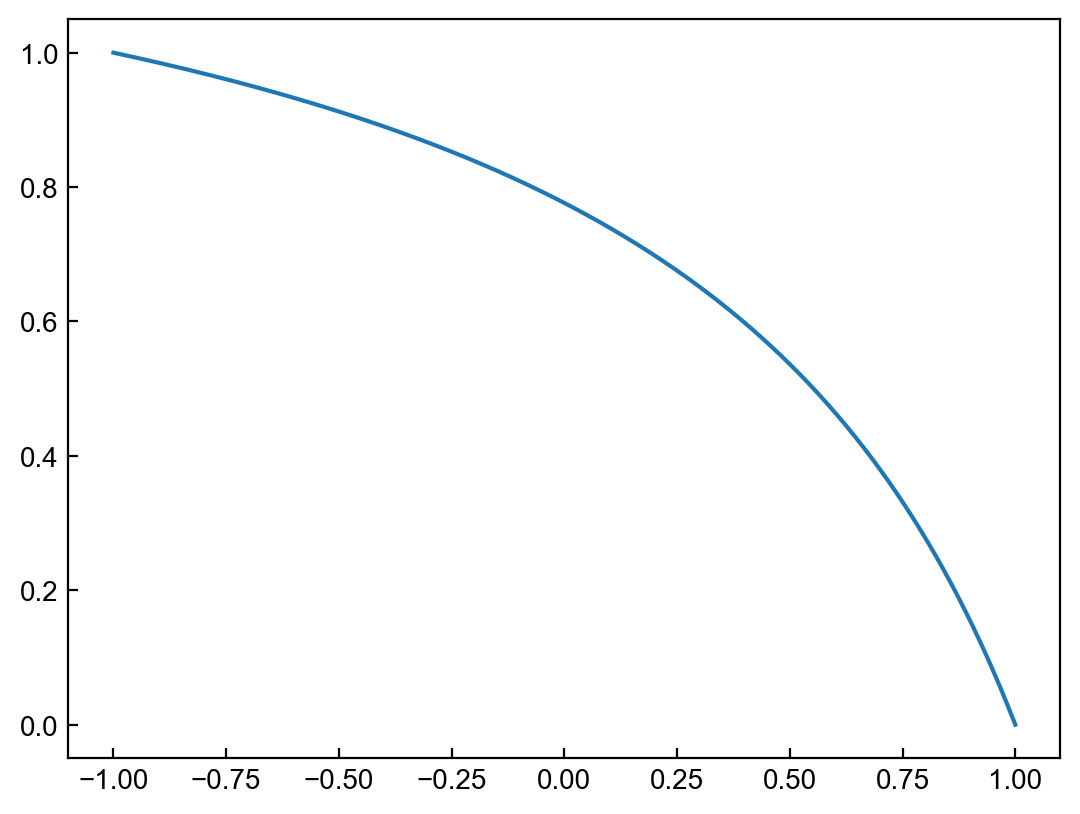

In [770]:
L = (1-cos1)*(1+b)/(1-b*cos1)/2

plt.plot(cos1,L)



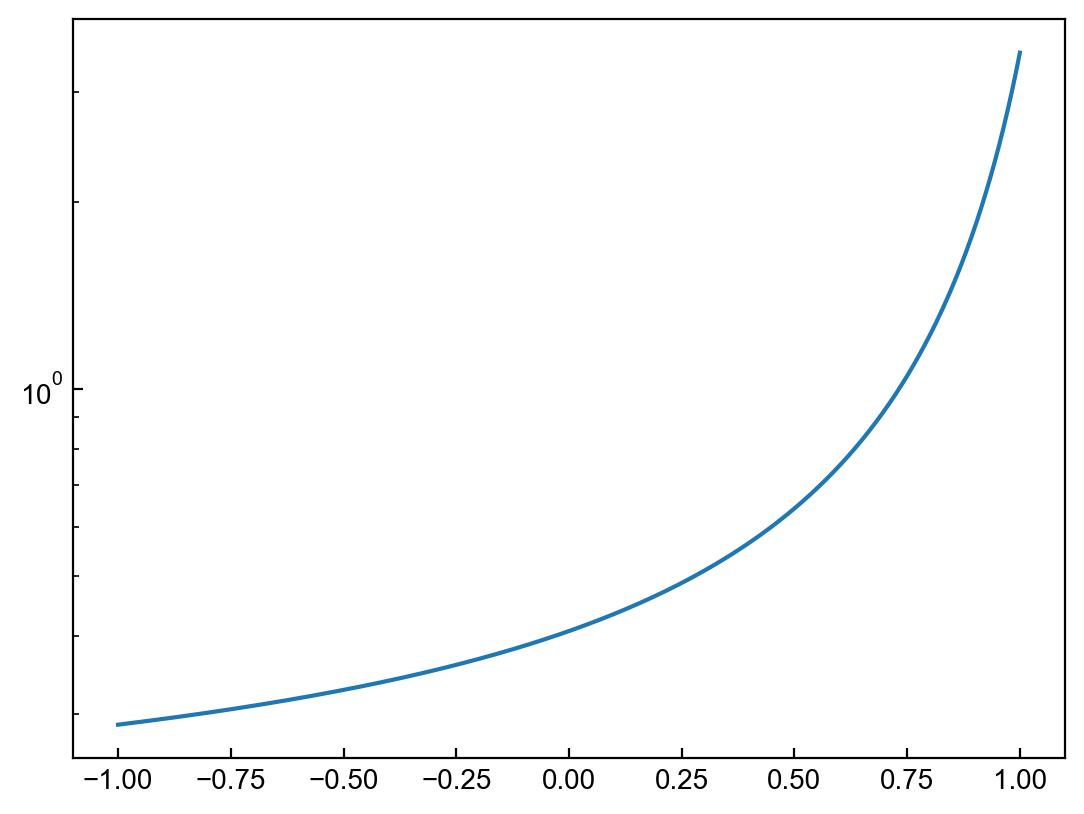

In [771]:
d = 1/(g*(1-b*cos))
plt.plot(cos1,d**2)
plt.yscale('log')